__Описание проекта__

  В данном проекте мы анализируем данные популярного сервиса аренды самокатов GoFast. Нам предоставлены данные о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
    
 _без подписки:_
- абонентская плата отсутствует;
- стоимость одной  минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

_с подпиской Ultra:_
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- cтоимость старта — бесплатно.

В ходе проекта мы будем анализировать данные и проверять некоторые гипотезы, которые могут помочь бизнесу вырасти.

__Описание исходных данных__

В исходных данных есть информация о пользователях, их поездках и подписках, представленных нам в виде трёх файлов формата csv.

_Информация о пользователях_ —  users_go.csv:

- ‘user_id’ — уникальный идентификатор пользователя; 
- ‘name’ — имя пользователя; 
- ‘age’ — возраст; 
- ‘city’ — город; 
- ‘subscription_type’ — тип подписки (free, ultra). 

_Информация о поездках_  —  rides_go.csv:

- 'user_id’ — уникальный идентификатор пользователя; 
- ‘distance’ — расстояние, которое пользователь проехал в текущей сессии (в метрах); 
- ‘duration’ — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»; 
- ‘date’ — дата совершения поездки. 

_Информация о подписках_ — subscriptions_go.csv:

- ‘subscription_type’ — тип подписки; 
- ‘minute_price’ — стоимость одной минуты поездки по данной подписке; 
- ‘start_ride_price’ — стоимость начала поездки; 
- ‘subscription_fee’ — стоимость ежемесячного платёж.

__Загрузка библиотек__

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np

import math
from math import sqrt
from math import factorial

import scipy
from scipy import stats as st
from scipy.stats import binom, norm

## Шаг.  Загрузка данных

__Загрузка файлов в датафреймы__

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])
    subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

__Изучение датафрейма с пользователями__

In [3]:
display(users.head())
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB



_В датафрейме «users» содержатся данные о пользователях, которые зарегистрированы в сервисе GoFast и пользовались услугами аренды самокатов. Всего в таблице 5 столбцов и 1565 строк._<br>
  
Столбцы в таблице названы в «змеином» стиле и содержат следующую информацию:
- user_id: Идентификатор пользователя.
- name: Имя пользователя.
- age: Возраст пользователя (целое число).
- city: Город, в котором были поездки.
- subscription_type: Тип подписки.<br>
  
_Все столбцы, за исключением «age», представляют собой строковый тип данных._


__Изучение датафрейма с поездками__

In [4]:
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


_В датафрейме с поездками содержатся данные о поездках пользователей сервиса GoFast. <br>Всего в таблице 4 столбца и 18068 строк.
Столбцы в таблице названы в «змеином» стиле и содержат следующую информацию:_
- 'user_id': Уникальный идентификатор пользователя.
- 'distance': Расстояние, которое пользователь проехал в текущей сессии (в метрах).
- 'duration': Продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку».
- 'date': Дата совершения поездки.  
  
_Все столбцы, за исключением «user_id», представляют собой вещественный тип данных. Тип данных для столбца «date» следует изменить на строковый._

__Изучение датафрейма с тарифами__

In [5]:
display(subs.head())
subs.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


_В представленном датафрейме содержатся данные о доступных подписках для пользователей. Всего в таблице 4 столбца и 2 строки.
Столбцы в таблице названы в «змеином» стиле и содержат следующую информацию:_
 - 'subscription_type': Тип подписки, доступный пользователю.
 - 'minute_price': Стоимость минуты поездки при выбранном типе подписки.
 - 'start_ride_price': Стоимость начала поездки: Оплата за начало поездки при выбранном типе подписки.
 - 'subscription_fee': Регулярная плата за использование подписки.  
  
  
_Все столбцы, за исключением «Тип подписки»(строковый), представляют собой целочисленный тип данных. При первичном анализе данных в таблице «subscriptions» не обнаружено проблем с типами данных или пропусками._

__Промежуточный вывод:__

_Все датафреймы загрузились без ошибок. В данных отсутствуют пропуски. Однако, в таблице "Поездки" поле 'date' имеет тип 'object', что требует внимания._  
  
`Общая характеристика данных:`  
_Исходные данные описывают информацию о пользователях и их поездках в сервисе GoFast, а также данные о доступных подписках. В таблице пользователей 1565 записей, в таблице поездок - 18068 записей, в таблице подписок - 2 записи. Типы данных в основном соответствуют ожидаемым, однако в таблице поездок необходимо исправить тип данных для столбца date._  
  
`Детализация данных:`   
_В таблице пользователей представлены данные о пользователях, включая их идентификаторы, имена, возраст, города и типы подписок. В таблице поездок содержатся данные о поездках, включая идентификаторы пользователей, дистанцию, продолжительность и дату каждой поездки. В таблице подписок представлена информация о доступных подписках, включая типы подписок, стоимость за минуту, начальную стоимость поездки и ежемесячную плату.  
Общее впечатление от данных - в целом они в порядке, однако, стоит обратить внимание на исправление типов данных в таблице с данными о поездках и на таблицу "Поездки", где поле date имеет неправильный тип данных._

##   Предобработка данных

### Перевод столбца с датой в адекватный формат

In [6]:
# rides.date = pd.to_datetime(rides.date)
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [8]:
rides['date'].min(), rides['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

_Как следует из обзора данных о поездках в представленном датафрейме, у нас данные за весь 2021 год, а тип поля «date» успешно приведен в соответствие с требованиями._

### Добавление столбца с месяцем поездки

In [9]:
rides['month'] = rides.date.dt.month

In [10]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


_Видим, что столбец с месяцем успешно добавлен_

### Проверка наличия пропущенных значений и дубликатов

#### Проверка наличия пропущенных значений:

In [11]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

_Ни в одном из датафреймов нет пропусков_

#### Проверка наличия дубликатов:

__Проверим наличие явных дубликатов в каждом из датафреймов:__

In [14]:
print('Количество дубликатов в таблице с пользователями -', users.duplicated().sum())
print('Количество дубликатов в таблице с поездками -', rides.duplicated().sum())
print('Количество дубликатов в таблице с подписками -', subs.duplicated().sum())

Количество дубликатов в таблице с пользователями - 31
Количество дубликатов в таблице с поездками - 0
Количество дубликатов в таблице с подписками - 0


В таблице с пользователями обнаружен 31 дубликат из 1565 строк.  Избавимся от них:

In [15]:
users = users.drop_duplicates()
users.duplicated().sum()

0

_Во всех датафреймах теперь нет явных дубликатов_

__Проверим наличие неявных дубликатов в каждом из датафреймов:__

Самое вероятное, что разные написания одного имени или опечатка могут дать неявные дубликаты. Просмотрим список имён:

In [16]:
print(sorted(users['name'].unique()))

['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья', 'Инна', 'Ирина', 'Камилла', 'Карина', 'Каролина', 'Кира', 'К

Сложно сказать наверняка. Исключим столбец целиком и проверим:

In [17]:
display(users.drop('name', axis=1, inplace=False).head())

print('Количество неявных дубликатов равно:', \
       users.drop('name', axis=1, inplace=False).duplicated().sum())

,user_id,age,city,subscription_type
0,1,22,Тюмень,ultra
1,2,31,Омск,ultra
2,3,20,Москва,ultra
3,4,26,Ростов-на-Дону,ultra
4,5,28,Омск,ultra


Количество неявных дубликатов равно: 0


Неявных дубликатов в списке имён нет. Проверять остальные столбцы по этой же схеме нет смысла, т.к. есть шанс удалить то, что дубликатом не является.

Посмотрим, есть ли неявные дубликаты в данных о поездках, удалив столбцы с более дискретными значениями:

In [18]:
display(rides.drop(['user_id', 'date', 'month'], axis=1, inplace=False).head())

print('Количество неявных дубликатов равно:', \
       rides.drop(['user_id', 'date', 'month'], axis=1, inplace=False).duplicated().sum())

,distance,duration
0,4409.919140,25.599769
1,2617.592153,15.816871
2,754.159807,6.232113
3,2694.783254,18.511000
4,4028.687306,26.265803


Количество неявных дубликатов равно: 0


__Вывод по предобработке данных:__  
  
_В процессе предобработки данных в датафрейме «rides» был добавлен столбец «month» и изменены типы данных столбцов.  Тип «date» изменен на «datetime», создан новый столбец с номером месяца на основе «date». В датафрейме "Пользователи" обнаружены и удалены дубликаты._  
  
`Детализация:`
 - Все данные проверены на наличие проблем с типами данных и пропущенными значениями.  
 - Типы данных соответствуют ожидаемым.  
 - В датафрейме пользователей удалены явные дубликаты. Больше явных дубликатов не найдено. 
 - Проверил каждый датафрейм на наличие неявных дубликатов. Неявных дубликатов не обнаружено.
 - Проверил данные на аномалии с годом - все данные за 2021 год.  
 - Убедился в правильности записи уникальных id, имён пользователей, дат - все в порядке.  
  
_Данные подготовлены к дальнейшей работе._

##  Исследовательский анализ данных

__Прежде чем приступить к глубокому анализу данных, ознакомимся с основными характеристиками и тенденциями в данных на примере нескольких представлений. Мы рассмотрим, как пользователи распределены по городам, представленным в данных, какое соотношение между пользователями с платной и бесплатной подпиской, как возраст пользователей представлен в данных, как распределяются поездки по расстоянию и продолжительности.
Мы опишем и визуализируем общую информацию о пользователях и поездках, чтобы получить широкое представление о контексте данных и выявить возможные паттерны и аномалии. Это поможет нам лучше понять данные и подготовиться к более детальному анализу.__

Напишем функции решения типичных задач для лаконичности и удобства восприятия кода.

In [19]:
#Функция отображения гистограммы

def hist_eye(column, bins_num, alpha, xlabel, ylabel, title):
    column.plot(kind='hist', bins=bins_num, sharex=True, sharey=True, alpha=alpha\
              , grid=True, legend=True, edgecolor=ecolor)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(labels)
    plt.gca().set_axisbelow(True)



In [20]:
#Функция форматирования граффика

def fsize(x, y):
    plt.figure(figsize=(x, y))

In [21]:
# Функция, которая выдаёт номера(num) чисел,
# равномерно распределённых от <start> до <stop>

def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

In [22]:
def bar_eye(x, y, alpha, xlabel, ylabel, title):
    plt.bar(x, y, alpha=alpha, edgecolor=ecolor)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(labels, fontsize=11)
    plt.gca().set_axisbelow(True)


### Частота встречаемости городов;

Посмотрим, что за города представлены в таблице.

In [23]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Сгруппируем таблицу с пользователями по городам, таким образом получим распределение по пользователям, без учёта количества поездок каждым.

In [24]:
city_list = users.groupby('city')['city'].agg('count').sort_values()
city_list

city
Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

In [25]:
total = city_list.sum()
print('Всего пользователей:', total)
city_percentage = pd.DataFrame(city_list)
city_percentage = city_percentage.assign(Процент=(city_list / total * 100).round(2))

display(city_percentage.rename(columns={'city': 'Пользователи'}))

Всего пользователей: 1534


,Пользователи,Процент
city,,
Москва,168,10.95
Тюмень,180,11.73
Омск,183,11.93
Сочи,189,12.32
Краснодар,193,12.58
Ростов-на-Дону,198,12.91
Екатеринбург,204,13.30
Пятигорск,219,14.28


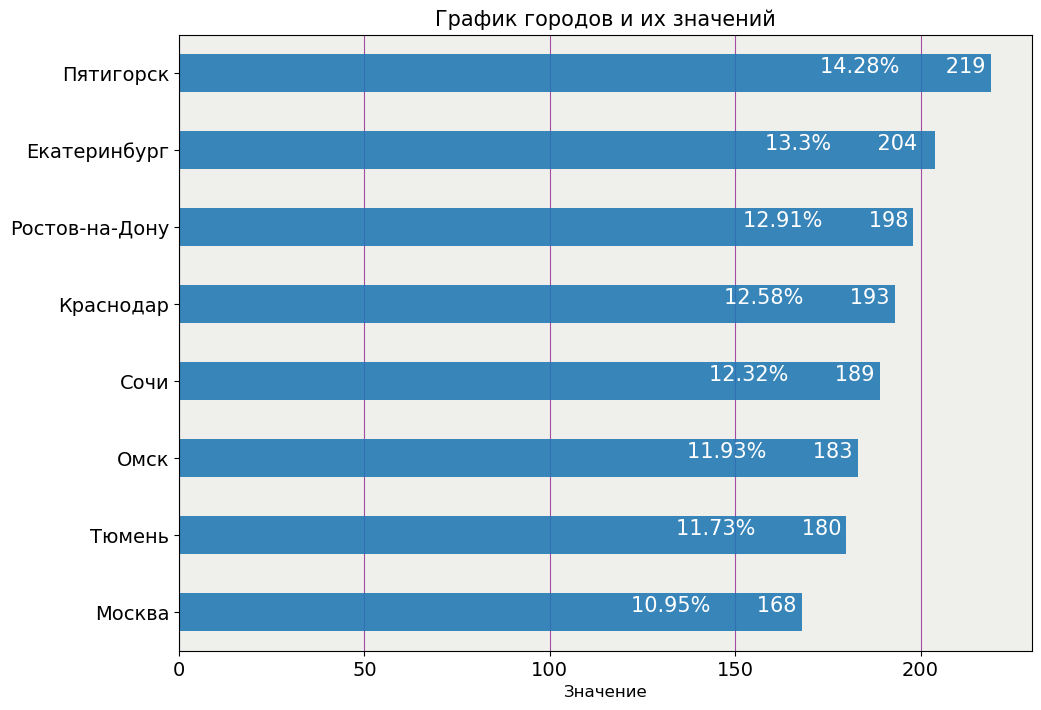

In [26]:
fsize(11, 8)
plt.rcParams['axes.facecolor'] = '#EFEFEC'
# Создание горизонтального столбчатого графика
bar_plot = city_list.plot.barh(alpha=0.88, fontsize=14)

plt.grid(which='both', axis='x', color='purple', in_layout = False, alpha=0.68)
plt.gca().set_axisbelow(True)

total = city_list.sum()

city_percentage = pd.DataFrame(city_list)
city_percentage = city_percentage.assign(Процент=(city_list / total * 100).round(2))



# Добавление текстовых подписей к столбцам
for i, v in enumerate(city_list):
    bar_plot.text(v - 46, i, str(city_percentage.iloc[i, 1])+ '%       '+ str(v), color='white', fontsize=15)


# Настройка осей и заголовка
plt.xlabel('Значение', fontsize=12)
plt.ylabel('')
plt.title('График городов и их значений', fontsize=15)

pass

_В целом, данные фреймы содержат информацию о пользователях из 8 разных городов.
Согласно данным в датафрейме, пользователи из различных городов представлены в следующих пропорциях:_  

- Больше всего пользователей из Пятигорска - 219 (14.28% от общего числа).
- Меньше всего пользователей из Москвы - 168 (10.95% от общего числа).  
  
_Распределение пользователей по городам показывает, что процент определённых горожан растёт от Москвы к Пятигорску  довольно линейно.
Эта информация может быть полезной для определения приоритетов в маркетинговых кампаниях, оптимизации логистики и других бизнес-решений, связанных с географическим расположением пользователей._

### Соотношение пользователей с подпиской и без подписки.

В данных представлено две категории пользователей, имеющих различные тарифные планы: 
- `без подписки:`
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- `с подпиской Ultra:`
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

In [27]:
display(users.head(3), users.tail(3))
users['subscription_type'].value_counts()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra


,user_id,name,age,city,subscription_type
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free
1533,1534,Альберт,25,Краснодар,free


subscription_type
free     835
ultra    699
Name: count, dtype: int64

Посмотрим, как распределены в датафрейме данные пользователей с подпиской и без:

In [28]:
# Индексы пользователей с подпиской
display(users[users['subscription_type'] == 'ultra'].index)

# Индексы пользователей без подписки
users[users['subscription_type'] == 'free'].index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       689, 690, 691, 692, 693, 694, 695, 696, 697, 698],
      dtype='int64', length=699)

Index([ 699,  700,  701,  702,  703,  704,  705,  706,  707,  708,
       ...
       1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533],
      dtype='int64', length=835)

Разделились на две группы, значит распределены отдельно: с 1 по 699 - пользователи с подпиской, с 700 по 1534 - без подписки(835 человек). Запишем в переменную номер пользователя, с которого начинаются строки с бесплатным тарифом

In [29]:
id_free = users[users['subscription_type'] == 'free']['user_id'].min()
id_free

700

Визуализируем соотношение пользователей с подпиской и без с помощью круговой диаграммы:

In [30]:
users['subscription_type'].value_counts().index

Index(['free', 'ultra'], dtype='object', name='subscription_type')

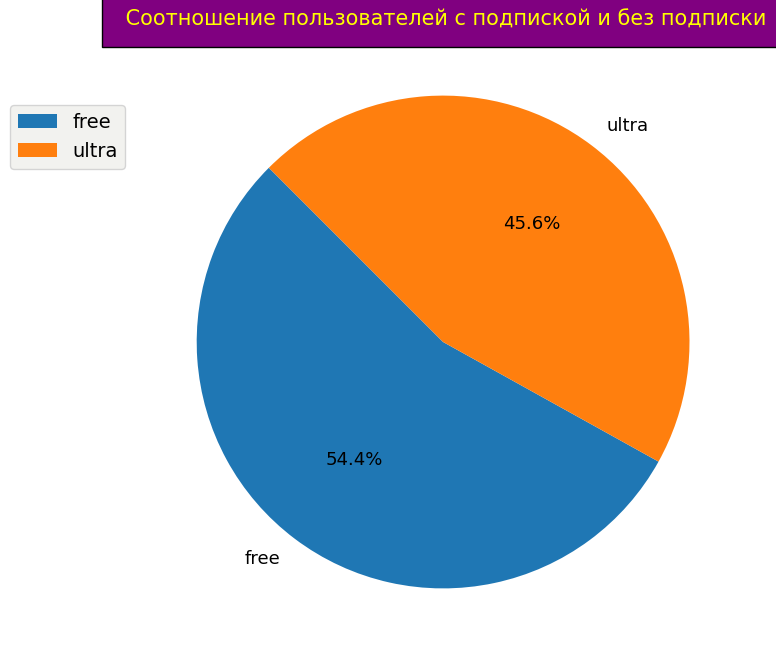

In [31]:
plt.figure(figsize=(8, 8))
labels = ['ultra', 'free']
users['subscription_type'].value_counts()\
.plot.pie(autopct='%1.1f%%', startangle=135, fontsize=13)

#Легенда и её расположение:
plt.legend(title='', labels=users['subscription_type'].value_counts().index, loc='upper right', 
                                 bbox_to_anchor=(0, 0.9),
                                 fontsize=14) 
plt.ylabel('')
plt.title(" Соотношение пользователей с подпиской и без подписки", bbox={'facecolor':'purple', 'pad':10}, fontsize=15, color='yellow')
pass

_Как видно из диаграммы и численных данных, пользователей без подписки немногим больше: 699 пользователей с подпиской(45,6%) против 835 пользователей(54,4%) с тарифом без абоненской платы. Для удобства дальнейших рассчётов, создадим отдельные датафреймы с данными о поездках для пользователей с подпиской и без._

In [32]:
rides_ultra = rides[rides['user_id'] < id_free]
rides_free = rides[rides['user_id'] >= id_free]

__Заодно посмотрим, какое соотношение пользователей с подпиской и без неё в разных городах. Составим таблицу для обладателей и необладателей подписки и так же визуализируем её__ 

In [33]:
# Создаём список с пользователями с подпиской по городам
city_list_ultra = users[users['user_id']<id_free].groupby('city')['city'].agg('count').sort_values() 
city_list_ultra.name = 'ultra' # переименовываем, чтобы название стало потом названием столбца в датафрейме

# Создаём список с пользователями без подписки по городам
city_list_free = users[users['user_id'] >= id_free].groupby('city')['city'].agg('count').sort_values()
city_list_free.name = 'free' 

city_list_uf = pd.concat([city_list_ultra, city_list_free], axis=1)
city_list_uf #Таблица со списками пользователей по городам, разделёнными по наличию или отсутствию подписки.

,ultra,free
city,,
Краснодар,81,112
Тюмень,82,98
Москва,84,84
Сочи,86,103
Ростов-на-Дону,89,109
Омск,91,92
Екатеринбург,92,112
Пятигорск,94,125


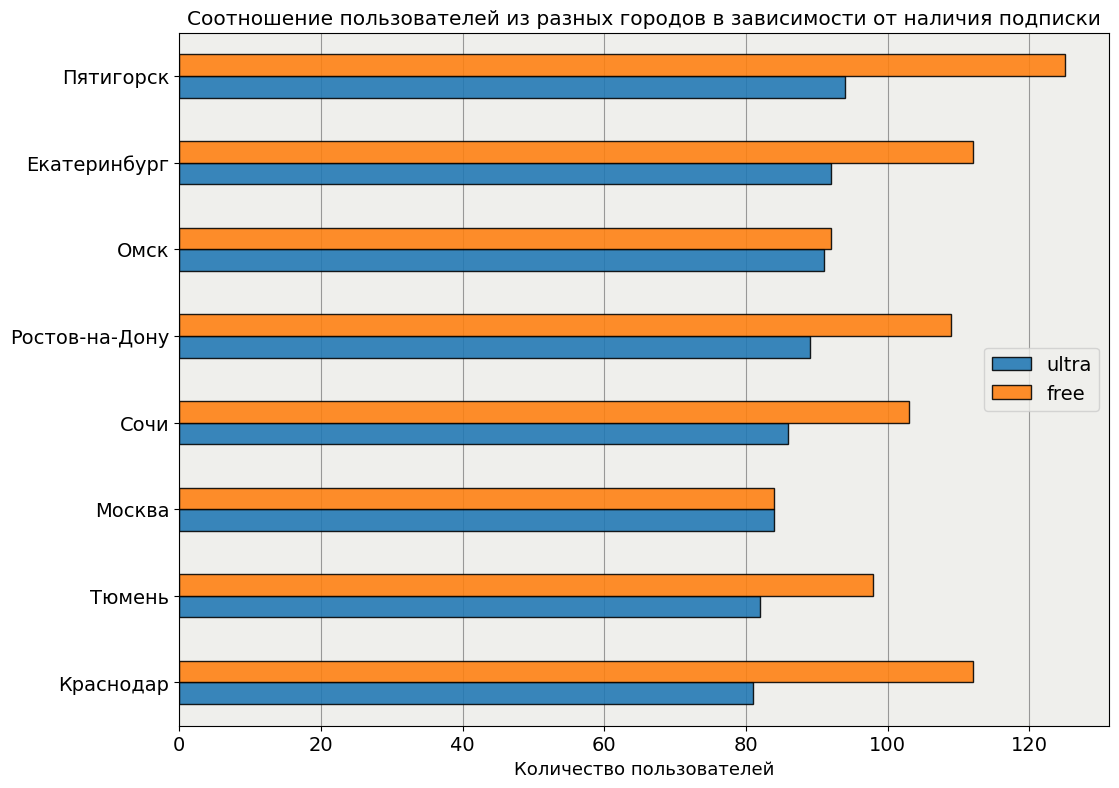

In [34]:
# Создание горизонтального столбчатого графика
bar_plot = city_list_uf.plot.barh(fontsize=14, alpha=0.88, figsize=(12, 9), edgecolor='black')
plt.rcParams['axes.facecolor'] = '#EFEFEC'
# Настройка осей и заголовка
plt.xlabel('Количество пользователей', fontsize=13)
plt.ylabel('')
plt.title('Соотношение пользователей из разных городов в зависимости от наличия подписки', fontsize=14.5)
plt.grid(which='both', axis='x', color='grey', alpha=0.78)
plt.gca().set_axisbelow(True)
plt.legend(fontsize=14, loc='right')

_Как мы помним, у нас 699 пользователей с подпиской(45,6%) и 835 пользователей без подписки(54,4%). В Краснодаре и Пятигорске преобладание тарифа без абон. платы - самое значительное, около трети от бОльшего. В Москве и Омске соотношение практически равное. В остальных городах преобладание от пятой части до четверти. Эта информация также вызывает интерес как потенциально используемая для улучшения сервиса на местах._


### Распределение возрастов пользователей;

Построим распределение пользователей по возрастам с помощью гистограммы:

In [35]:
len(users['age'].unique()) # Для определения количества корзин гистограммы.

29

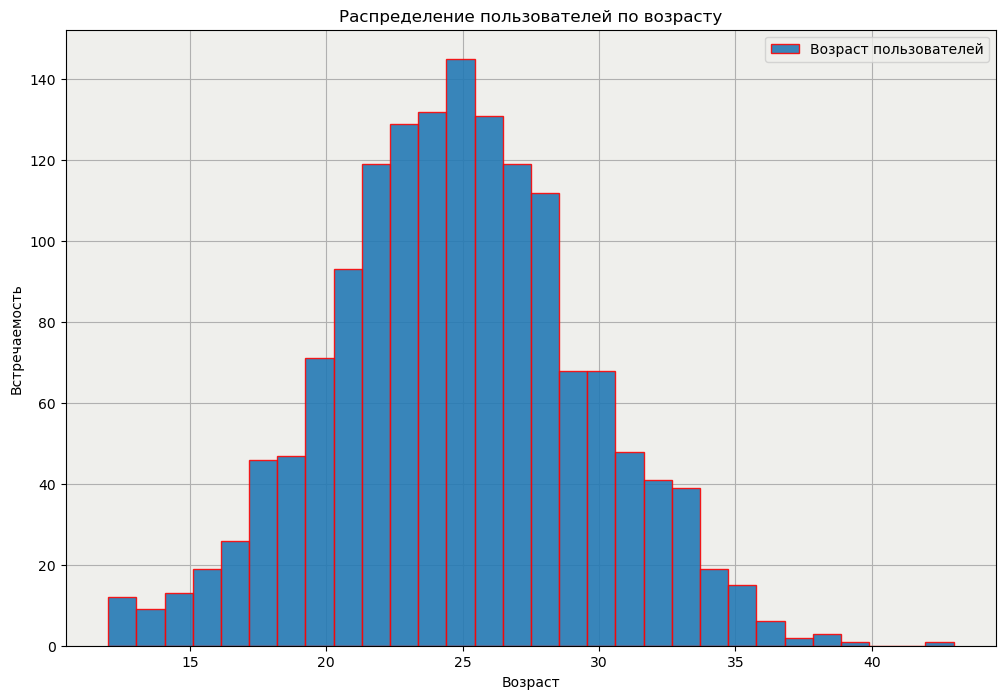

In [36]:
fsize(12, 8)

labels = ['Возраст пользователей']
ecolor = 'red'
hist_eye(users['age'], 30, 0.88, 'Возраст', 'Встречаемость', 'Распределение пользователей по возрасту')

In [37]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

_Согласно данным и визуализации, пользователи сервиса аренды самокатов GoFast охватывают широкий возрастной диапазон: от 12 до 43 лет. Распределение возрастов имеет кривую, по характеру напоминающую нормальное распределение, с максимальным количеством пользователей в возрасте 25 лет, который также является медианным возрастом.
Больше всего людей находятся в возрастной группе от 20 до 30 лет. Медиана возрастов приходится на 25 лет, нижний квартиль - примерно 22 года, верхний - около 28 лет. Аномалий или выбросов в данных не обнаружено. Эта информация может быть полезной для понимания целевой аудитории сервиса и разработки стратегий маркетинга и обслуживания._

### Расстояние, которое  пользователь преодолел за одну поездку;

Выведем гистограмму по расстоянию, которое пользователь преодолел за одну поездку:

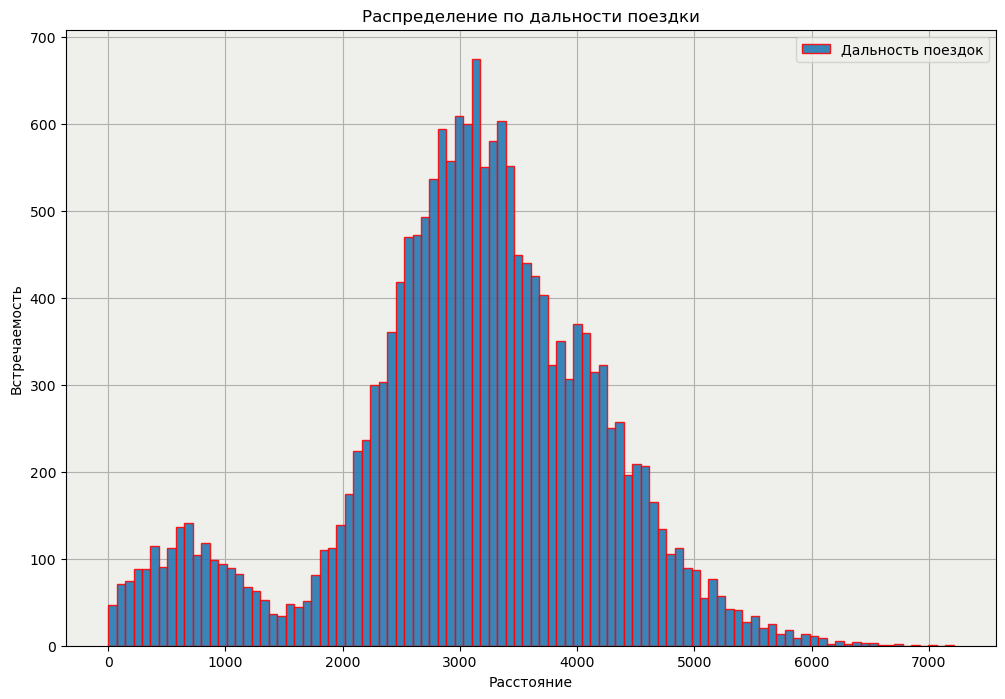

In [38]:
fsize(12, 8)
labels = ['Дальность поездок']
hist_eye(rides['distance'], 100, 0.88, 'Расстояние', 'Встречаемость', 'Распределение по дальности поездки')

In [39]:
len(rides['distance'].unique())

18068

In [40]:
print('Уникальных дистанций поездок:', len(rides['distance'].unique()))
rides['distance'].describe()

Уникальных дистанций поездок: 18068


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

`Посмотрим на характер распределения малого пика:`

__Распределение по дальности поездок не длиннее 1,5 км:__

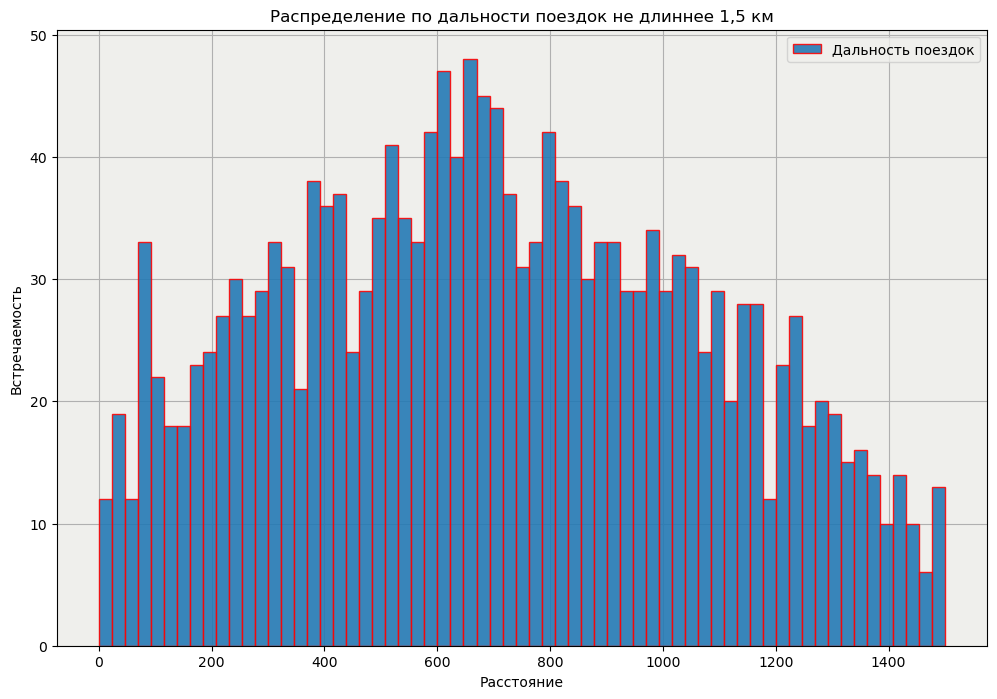

In [41]:
fsize(12, 8)
labels = ['Дальность поездок']
hist_eye(rides[rides['distance'] < 1500]['distance'], 65, 0.88, 'Расстояние', 'Встречаемость', 'Распределение по дальности поездок не длиннее 1,5 км')

_Согласно получившейся визуализации и статистическим данным, дальность поездок пользователей сервиса GoFast распределяется довольно широко. Всего уникальных значений пройденной дистанции — 17973. На распределении наблюдается два пика: малый пик - около 700 метров и большой пик - около 3,15 километров. Судя по гистограммам, имеем нормальное распределение на обоих пиках. Большинство поездок составляют от 2 до 5 километров, со средним значением около 3,06 километров и медианой немного больше среднего значения - 3,13 километров._  
  
_Также стоит отметить, что поездки варьируются от 1 метра до 7,21 километров, а то что поездки как бы делятся на небольшое количество довольно коротких поездок менее 1 км и на основную массу поездок в районе 3 км, свидетельствует о том, что некоторые пользователи использовали самокат как дополнительное транспортное средство для коротких поездок, например, чтобы добраться до станции метро или другой остановки общественного транспорта. Наличие малого пика по причине нахождения неисправности в самокате я бы считал маловероятной, так как поломка часто будет отражаться в поездках на первых 50 м, чего не наблюдается.
Эти данные позволяют лучше понять поведение пользователей и оптимизировать стратегии сервиса, такие как планирование маршрутов, предложение дополнительных услуг и т.п._

### Продолжительность поездок.

Построим гистограмму распределения поездок по продолжительности, используя столбец из датафрейма с информацией о поездках:

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

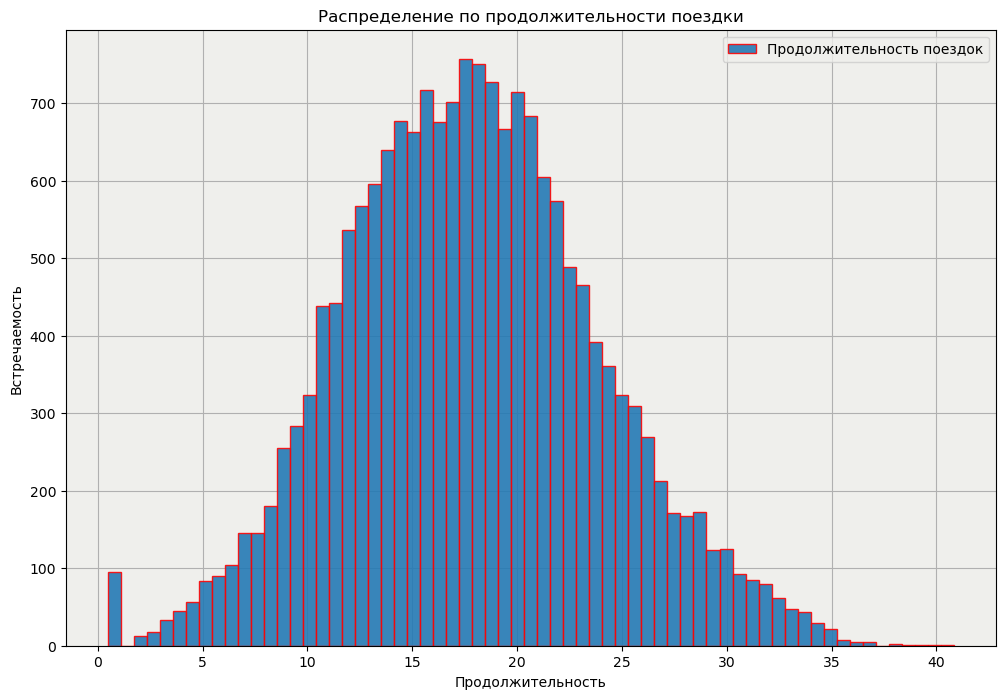

In [42]:
fsize(12, 8)
labels = ['Продолжительность поездок']
hist_eye(rides['duration'], 65, 0.88, 'Продолжительность', 'Встречаемость', 'Распределение по продолжительности поездки')
rides['duration'].describe()

Время поездок находится в границах от 0 минут и до 41 мин. Поездки продолжительностью меньше 5 минут стоит рассмотреть более пристально:

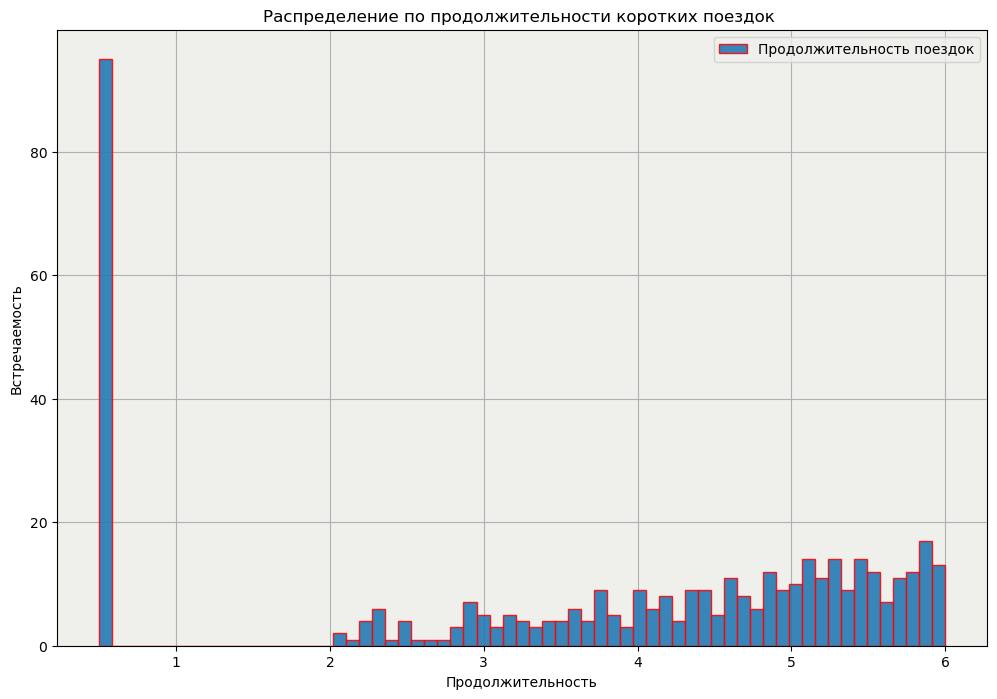

In [43]:
fsize(12, 8)
hist_eye(rides[rides['duration']<6]['duration'], 65, 0.88, 'Продолжительность', 'Встречаемость', 'Распределение по продолжительности коротких поездок ')

Начиная с 2 мин идёт нормальное распределение, а около начала отсчёта - аномалия:

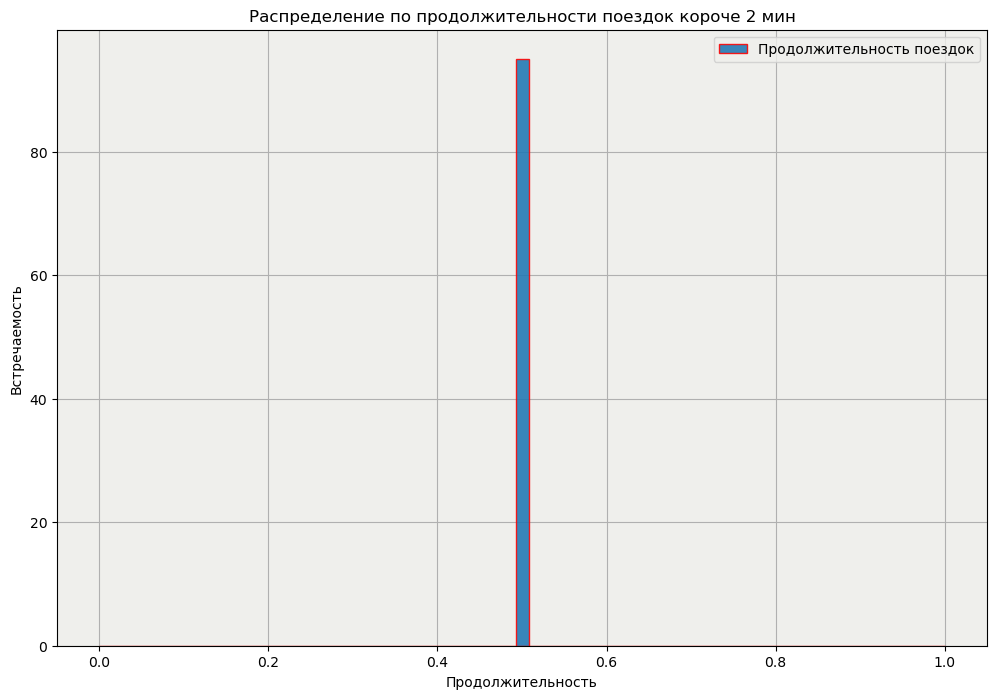

In [44]:
fsize(12, 8)
hist_eye(rides[rides['duration']<2]['duration'], 65, 0.88, 'Продолжительность', 'Встречаемость', 'Распределение по продолжительности поездок короче 2 мин')

In [45]:
rides[rides['duration']<2]['duration']

6531     0.5
6570     0.5
6680     0.5
6695     0.5
6768     0.5
        ... 
17004    0.5
17242    0.5
17314    0.5
17505    0.5
17909    0.5
Name: duration, Length: 95, dtype: float64

Все 95 поездок ровно по полминуты, что крайне нетипично для нашего датасета.

In [46]:
rides[rides['duration']<2]['distance'].min(), rides[rides['duration']<2]['distance'].max()

(4030.308008428866, 7211.007744598519)

Сомнительно за полминуты проезжать от 4 до 7 км. Посмотрим распределение по времени таких продолжительных поездок:

In [47]:
rides.query('4000 < distance <7211')['duration']

0        25.599769
4        26.265803
10       17.674448
14       25.109188
32       25.848038
           ...    
18034    32.013212
18040    31.007839
18053    21.163887
18055    15.228198
18062    22.560373
Name: duration, Length: 3477, dtype: float64

'Количество поездок:'

3477

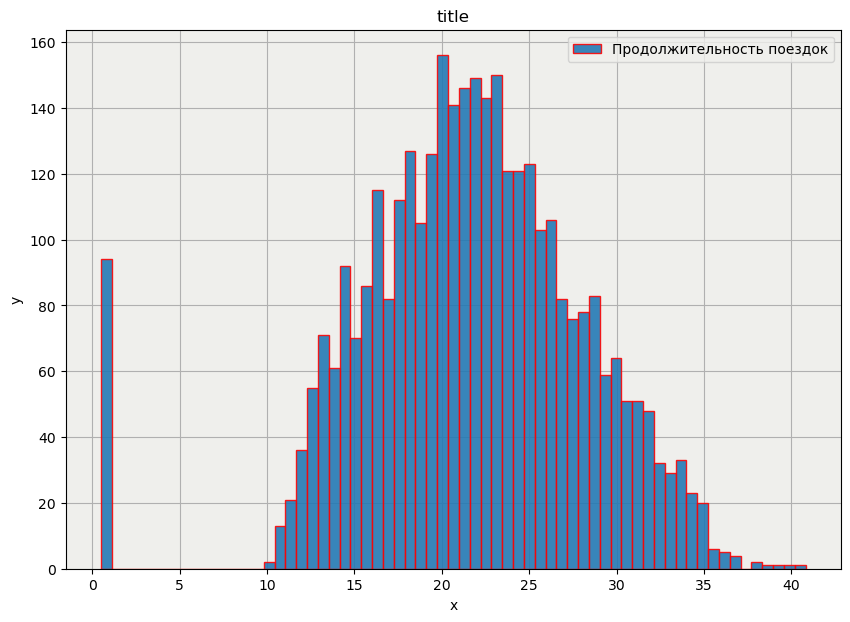

In [48]:
fsize(10, 7)
hist_eye(rides.query('4000 < distance <7211')['duration'], 65, 0.88, 'x', 'y','title')
display('Количество поездок:', len(rides.query('4000 < distance <7211')['duration']))

Судя по всему, в данных об этих 95 полуминутных поездках неправильно заполнены ячейки с продолжительностью пути.

In [49]:
rides[rides['duration']<2]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [50]:
display(rides['date'].min())
display(rides['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

Пока, кроме того, что эти поездки были совершены пользователями без подписки, ничего не выяснилось. За такое время проехать такое расстояние нереально, даже если поставить самокат на скоростной поезд(при этом пользователи с подпиской до такого "додуматься" не в состоянии:)

__На основе проанализированных данных можно сделать следующие выводы:__  


- _`Географическое распределение:`  
Пользователи из разных городов представлены в разных пропорциях. Больше всего пользователей из Пятигорска, а меньше всего из Москвы. Это может быть связано с различными факторами, такими как популярность сервиса в разных регионах, доступность и удобство использования._  
  
  
- _`Подписочные планы:`   
Большинство пользователей (около 54.4%) не используют платные подписочные планы, предпочитая бесплатный вариант. Это может говорить, например, о том, что для многих пользователей самокаты являются дополнительным транспортным средством, а не основным._  
  
  
- _`Возраст пользователей:`   
Услугами сервиса пользуются люди в возрасте от 12 до 43 лет. Максимальное количество пользователей находится в районе 25 лет, который также является медианным возрастом. Это указывает на то, что сервис наиболее популярен среди людей среднего возраста._  
  
  
- _`Дальность поездок:`  
Диапазон дальности поездок составляет от 1 метра до более 7 километров. Медиана всех значений составляет около 3,13 километров. Наблюдаются два пика: малый около 700 метров и большой около 3,2 километра. Это свидетельствует о том, что большинство поездок или довольно короткие или довольно длинные, а не имеют одну определенную среднюю дистанцию. Малый пик может быть связан с поездками, совершаемыми, например, до станции метро. В пределах пиков данные распределены нормально_  
  
  
- _`Продолжительность поездок:`   
Продолжительность поездок распределена нормально, с медианой в 18 минут. Наблюдается небольшой выброс с продолжительностью в полминуты, имеющий аномально большую дальность поездки._ 

##  Объединение данных

### Объединение данных о пользователях, поездках и подписках 

In [51]:
display(users.head())
rides.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


__Объединяем таблицы с пользователями и поездками по столбцу с номером пользователя:__

In [52]:
usersrides = users.merge(rides, how = 'left', on='user_id')
usersrides.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


__Объединяем вышесозданную таблицу с таблицей с данными о подписке по столбцу с типом подписки:__

In [53]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [54]:
data = usersrides.merge(subs, how = 'left', on='subscription_type')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [55]:
data.info()
print('Количество дубликатов в объединённых данных:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB
Количество дубликатов в объеди

_Судя по полученным датафреймам, статистике и отсутствию дубликатов, данные объединены успешно._

### Создание отдельных датафреймов для пользователей с подпиской и без неё.

#### Cоздание отдельного датафрейма с данными о пользователях без подписки

In [56]:
data_subless = data.query('subscription_type == "free"')
print('Поездок пользователями без подписки:', len(data_subless)) # количество строк датафрейма с данными о пользователях без подписки
data_subless.head()

Поездок пользователями без подписки: 11568


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


#### C данными о пользователях с подпиской

In [57]:
data_subfull = data.query('subscription_type == "ultra"')
print('Поездок пользователями c подпиской:', len(data_subfull)) # количество строк датафрейма с данными о пользователях с подпиской
data_subfull.head()

Поездок пользователями c подпиской: 6500


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [58]:
len(rides_ultra) == len(data_subfull)

True

_Сразу можно заметить, что отношение количества поездок к количеству пользователей для обладателей подписки и для самокатчиков без оной отличается. В п.3.2 мы выяснили, что пользователей без подписки - 835, а поездок на них приходится 11568. Пользователей с подпиской - 699 с 6500 поездками. Т.е. в первом случае(free) в среднем на пользователя почти 14 поездок, а во втором(ultra) - чуть больше 9. С большой долей уверенности можно сказать, что характер поездок у этих категорий пользователей разный. Будем уделять этим предположениям внимание на дальнейших этапах анализа._  
  
 
_Количество строк не изменилось, дубликатов нет, т.к. их не было в материнском датафрейме. Можем использовать полученные фреймы в дальнейшем_

### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

__Сравнение по расстоянию, преодолённому за одну поездку:__

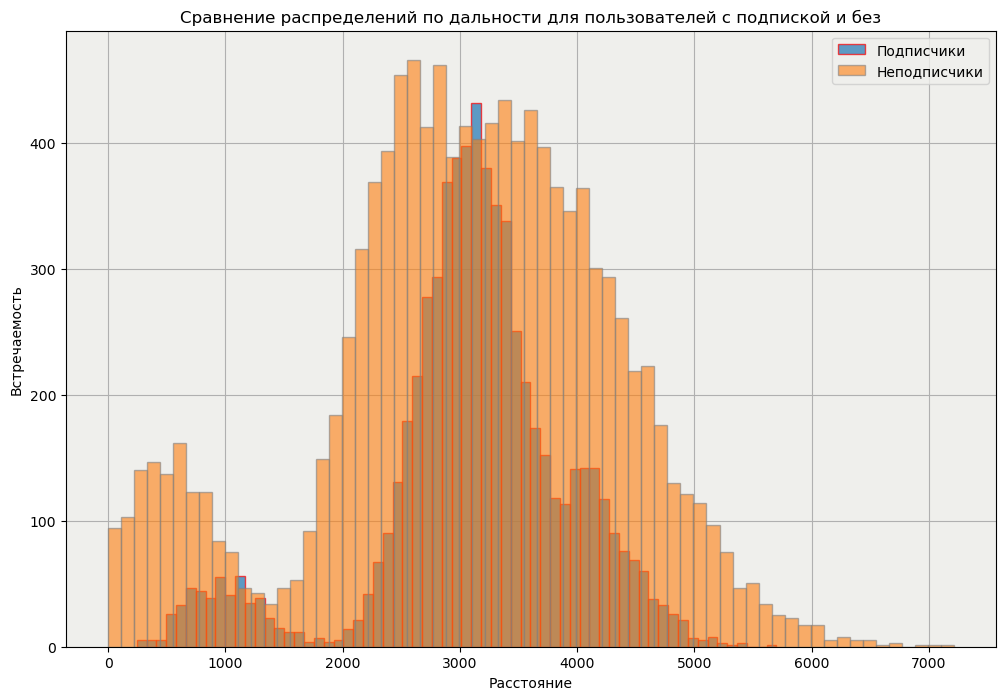

In [59]:
fsize(12, 8)
ecolor='red'
hist_eye(data_subfull['distance'], 65, 0.7, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
ecolor='grey'
hist_eye(data_subless['distance'], 65, 0.6, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.legend(('Подписчики','Неподписчики'))
plt.title('Сравнение распределений по дальности для пользователей с подпиской и без')
plt.show()

У пользователей с подпиской наблюдается третий пик правее основного. Увеличим эту область отдельно:

_Распределение по дальности для подписчиков для поездок более 3 км:_

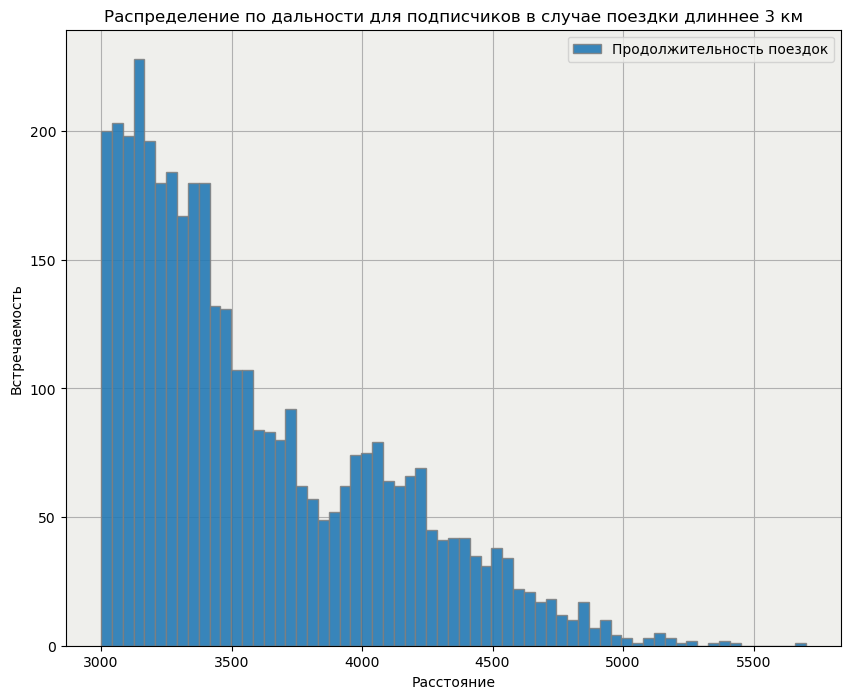

In [60]:
fsize(10, 8)
hist_eye(data_subfull[data_subfull['distance'] > 3000]['distance'], 65, 0.88, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков в случае поездки длиннее 3 км')


`У пользователей с подпиской наблюдается не совсем отчетливый третий пик встречаемости с максимумом в районе 4 км.`

__Сравнение по продолжительности поездки:__

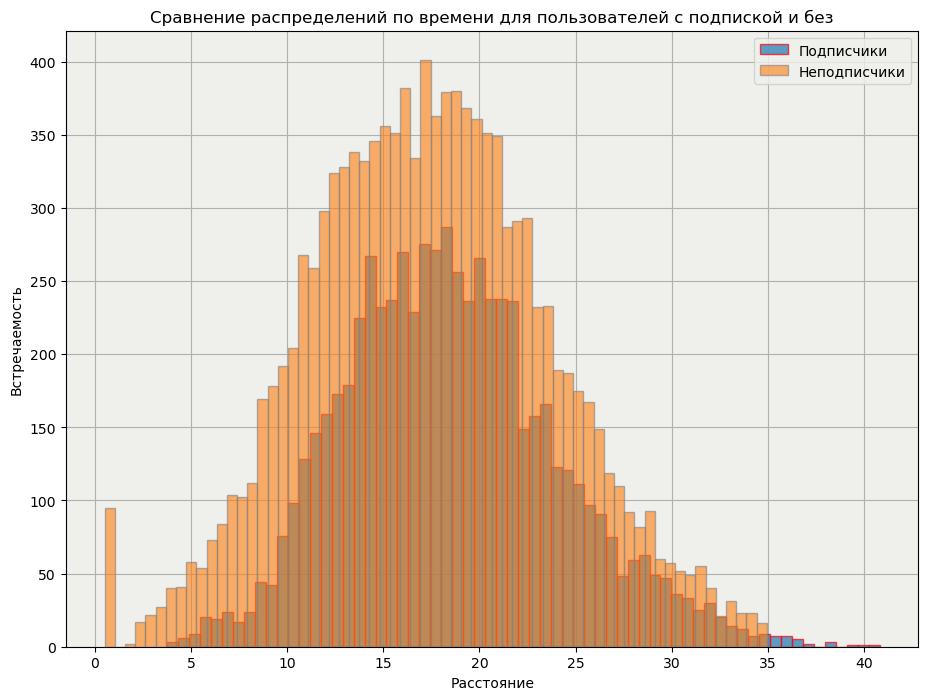

In [61]:
fsize(11, 8)
ecolor='red'
hist_eye(data_subfull['duration'], 65, 0.7, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
ecolor='grey'
hist_eye(data_subless['duration'], 65, 0.6, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.legend(('Подписчики','Неподписчики'))
plt.title('Сравнение распределений по времени для пользователей с подпиской и без')
plt.show()

In [62]:
usersrides

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


_Если посмотреть на график плотности вероятности преодоленного расстояния пользователями с подпиской и без неё, можно убедиться, что предположение о различиях в поведении пользователей с подпиской и без неё верно.    
Пользователи без подписки имеют более равномерное(широкое) распределение как по времени, так и по расстоянию поездок. Они совершают чуть более дальние поездки, но среднее малого пика по дальности поездки у них значимо меньше, что может сигнализировать о бОльшей склонности пользователей с подпиской к более продолжительным поездкам._

_С другой стороны, пользователи с подпиской предпочитают чуть более долгие по времени поездки, но их поездки имеют меньшее расстояние. В этой группе пользователей также отмечается меньшее количество коротких по расстоянию, но продолжительных по времени поездок.
У пользователей с подпиской наблюдается не совсем отчетливый третий пик встречаемости с максимумом в районе 4 км.
Вероятно, пользователи без подписки, которые совершают короткие, но продолжительные поездки, включают в себя новых пользователей, только знакомящихся с сервисом и учащихся взаимодействовать с ним и самокатами.
Для пользователей с подпиской преобладающими являются поездки примерно на 3100 метров и продолжительностью примерно 18 минут. 
Для пользователей без подписки преобладающее значение расстояния и продолжительности — 2749.5 метров и 17 минут._ 


__Сравнение разных возрастных групп по дальности поездки:__

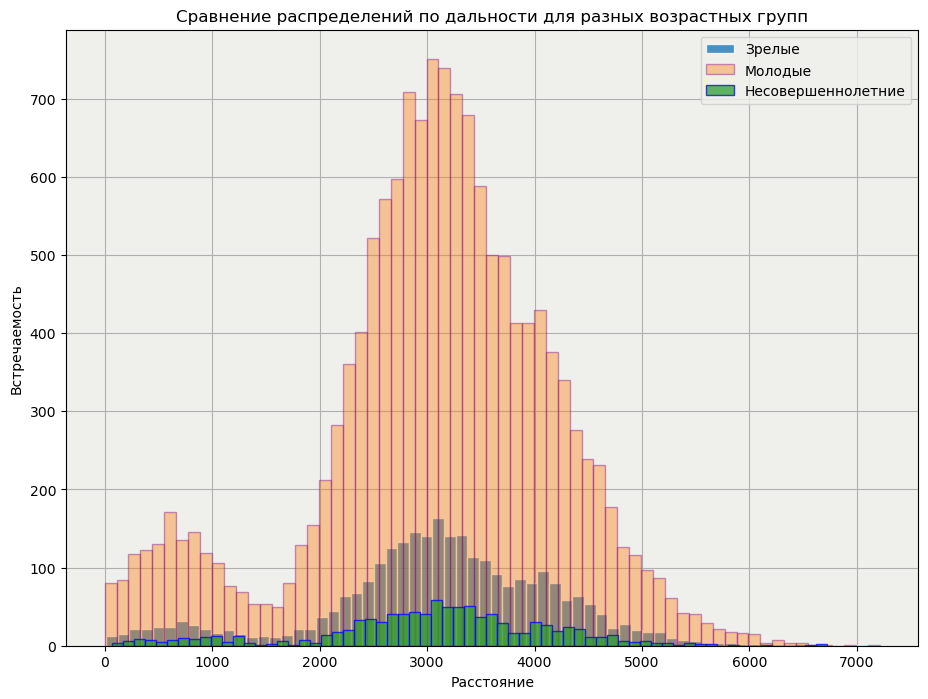

In [63]:
fsize(11, 8)
ecolor='white'
hist_eye(data[data['age'] > 29]['distance'], 65, 0.8, 'Расстояние', 'Встречаемость', 'для зрелых пользователей')
ecolor='purple'
hist_eye(data.query('17 < age < 30')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'для молодых')
ecolor='blue'
hist_eye(data[data['age'] < 18]['distance'], 65, 0.75, 'Расстояние', 'Встречаемость', 'для несовершеннолетних')

plt.legend(('Зрелые','Молодые','Несовершеннолетние'))
plt.title('Сравнение распределений по дальности для разных возрастных групп')
plt.show()

In [64]:
rides['month']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month, Length: 18068, dtype: int32

__Распределение количества поездок по месяцам:__

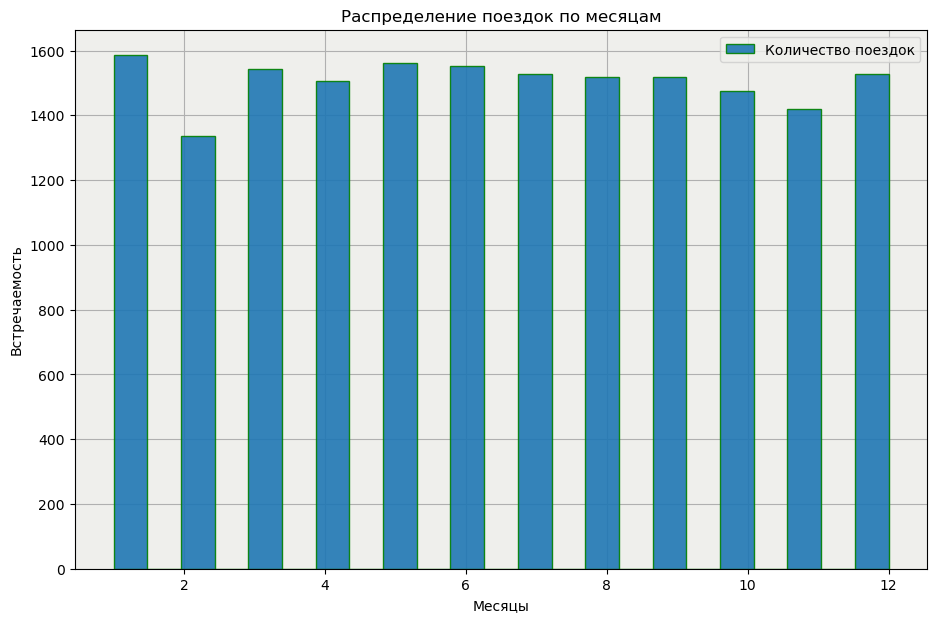

In [65]:
fsize(11, 7)
labels = ['Количество поездок']
ecolor = 'green'
hist_eye(rides['month'], 23, 0.9, 'Месяцы', 'Встречаемость', 'Распределение поездок по месяцам')

_Количество поездок довольно слабо зависит от месяца, за исключением, возможно, низких показателей у февраля и ноября(самые депрессивные, на мой взгляд))._

__Распределение дальности поездок по месяцам:__

Посмотрим распределение по месяцам средних по дальности всех поездок:

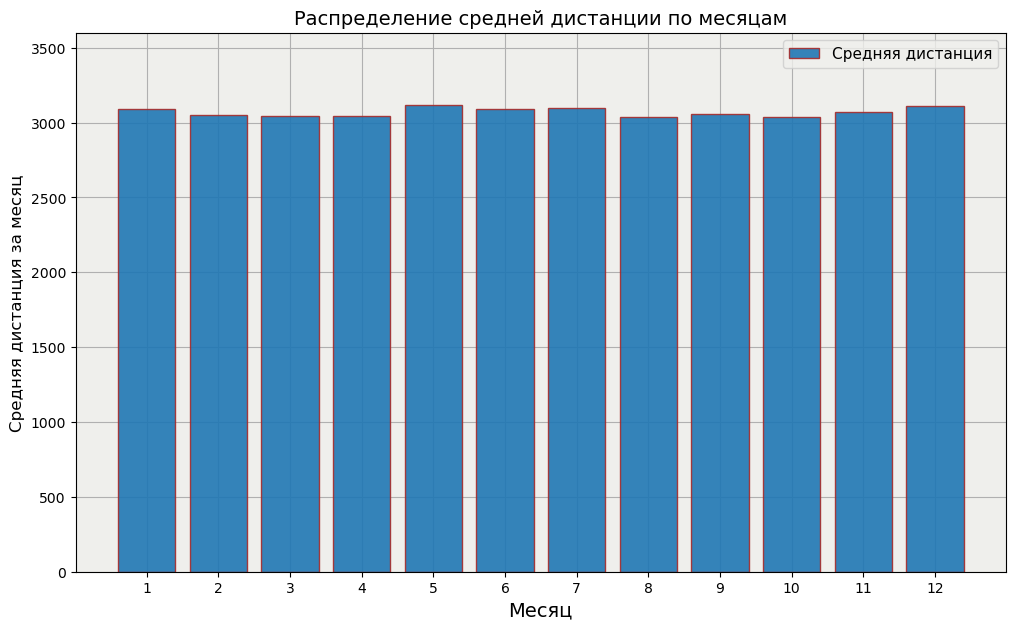

In [66]:
month_mean_distance = rides.groupby('month')['distance'].mean().round()\
             .reset_index()\
             .sort_values(by='month', ascending=True)['distance']

fsize(12, 7)
labels = (['Средняя дистанция'])
ecolor = 'brown'
bar_eye(range(1, 13), month_mean_distance, 0.9, 'Месяц', 'Средняя дистанция за месяц', 'Распределение средней дистанции по месяцам')

plt.xticks(ticks=list(range(1, 13)))
plt.ylim(0, 3600)
plt.grid(True, axis='both')

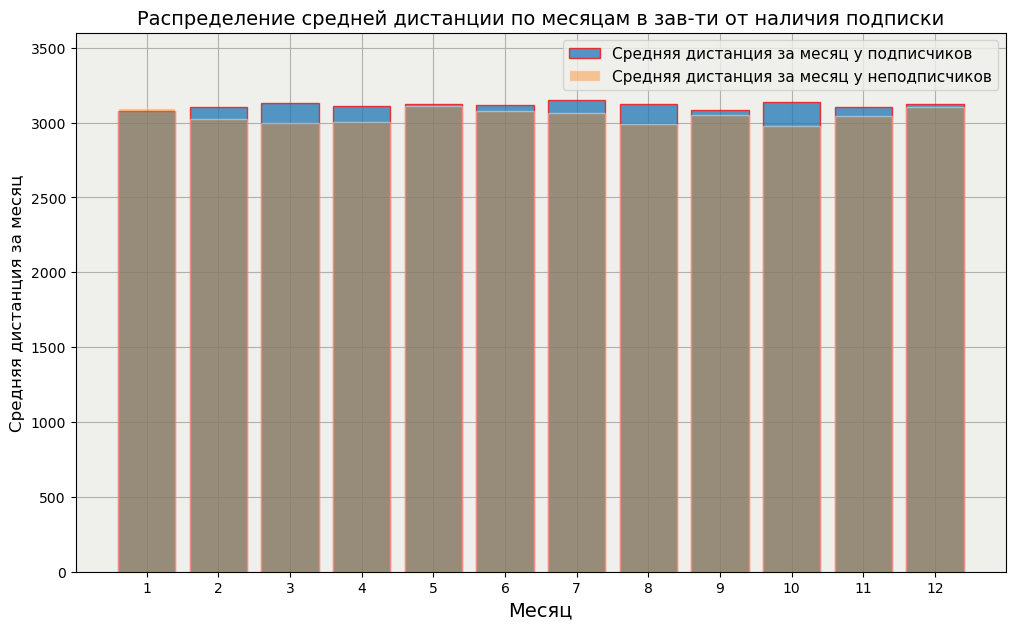

In [67]:
# rides_ultra
month_mean_distance_ultra = rides_ultra.groupby('month')['distance'].mean().round()\
             .reset_index()\
             .sort_values(by='month', ascending=True)['distance']

# rides_free
month_mean_distance_free = rides_free.groupby('month')['distance'].mean().round()\
             .reset_index()\
             .sort_values(by='month', ascending=True)['distance']

fsize(12, 7)
ecolor = 'red'
bar_eye(range(1, 13), month_mean_distance_ultra, 0.75, 'Месяц', 'Средняя дистанция за месяц', 'Распределение средней дистанции по месяцам для подписчиков')
labels = (['Средняя дистанция за месяц у подписчиков', 'Средняя дистанция за месяц у неподписчиков'])
ecolor = 'white'
bar_eye(range(1, 13), month_mean_distance_free, 0.40, 'Месяц', 'Средняя дистанция за месяц', 'Распределение средней дистанции по месяцам в зав-ти от наличия подписки')

plt.xticks(ticks=list(range(1, 13)))
plt.ylim(0, 3600)
plt.grid(True, axis='both')

Подготовим списки со средними дистанциями каждого пользователя в зависимости от подписки, для визуализации разницы в течение года:

In [68]:
rides_ultra_groupped_distance =rides_ultra.groupby(['month', 'user_id'])['distance'].mean().reset_index()

rides_ultra_groupped_duration =rides_ultra.groupby(['month', 'user_id'])['duration'].mean().reset_index()

rides_free_groupped_distance =rides_free.groupby(['month', 'user_id'])['distance'].mean().reset_index()

rides_free_groupped_duration =rides_ultra.groupby(['month', 'user_id'])['duration'].mean().reset_index()


__Понаблюдаем распределение среднемесячной дальности поездки по месяцам у пользователей с подпиской и без:__

- Распределение средней дистанции у подписчиков:

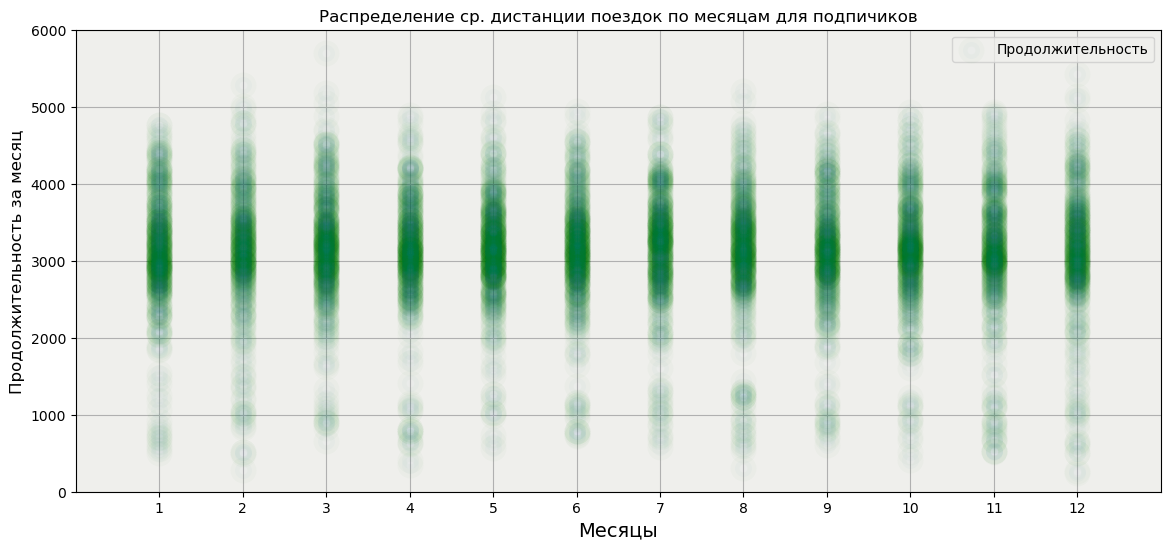

In [69]:
fsize(14,6)

plt.scatter(x=rides_ultra_groupped_distance['month'], y=rides_ultra_groupped_distance['distance']\
          , alpha=0.02, s=150, linewidths=6.5, edgecolor='green')

plt.title('Распределение ср. дистанции поездок по месяцам для подпичиков')
plt.legend(['Продолжительность'])

plt.ylim(0, 6000)
plt.xlim(0, 13)

plt.gca().set_axisbelow(True)

plt.xticks(ticks=list(range(1, 13)))
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Продолжительность за месяц', fontsize=12)

plt.grid(True)

- Распределение средней дистанции у пользователей без подписки:

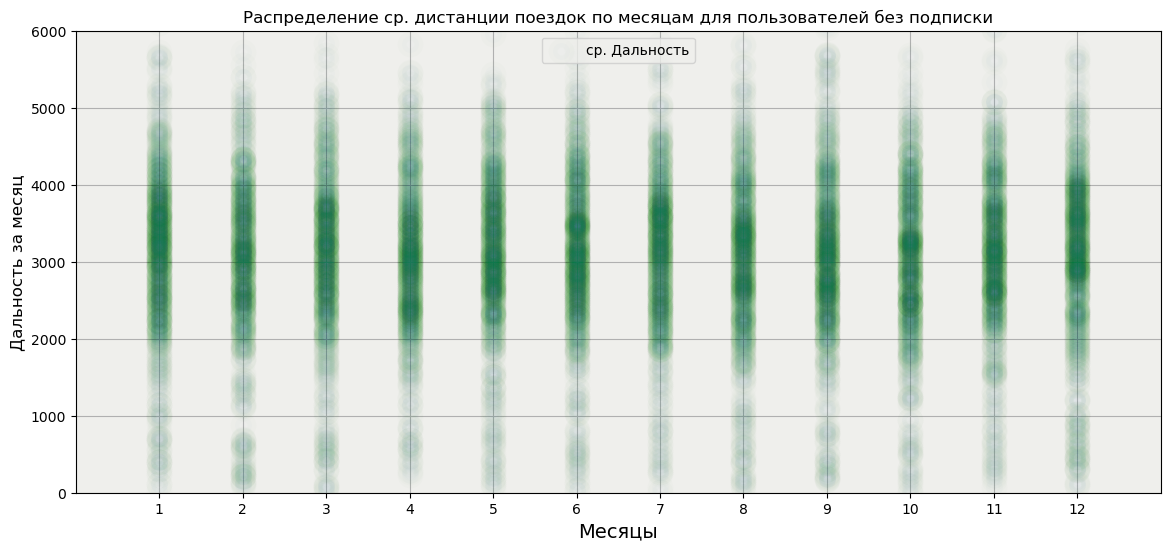

In [70]:
fsize(14,6)

plt.scatter(x=rides_free_groupped_distance['month'], y=rides_free_groupped_distance['distance']\
          , alpha=0.01, s=150, linewidths=6.5, edgecolor='green')

plt.title('Распределение ср. дистанции поездок по месяцам для пользователей без подписки')
plt.legend(['ср. Дальность'])

plt.ylim(0, 6000)
plt.xlim(0, 13)

plt.gca().set_axisbelow(True)

plt.xticks(ticks=list(range(1, 13)))
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Дальность за месяц', fontsize=12)

plt.grid(True)

__Понаблюдаем распределение среднемесячной продолжительности поездки по месяцам у пользователей с подпиской и без:__

- Распределение ср. продолжительности поездок по месяцам для подпичиков:

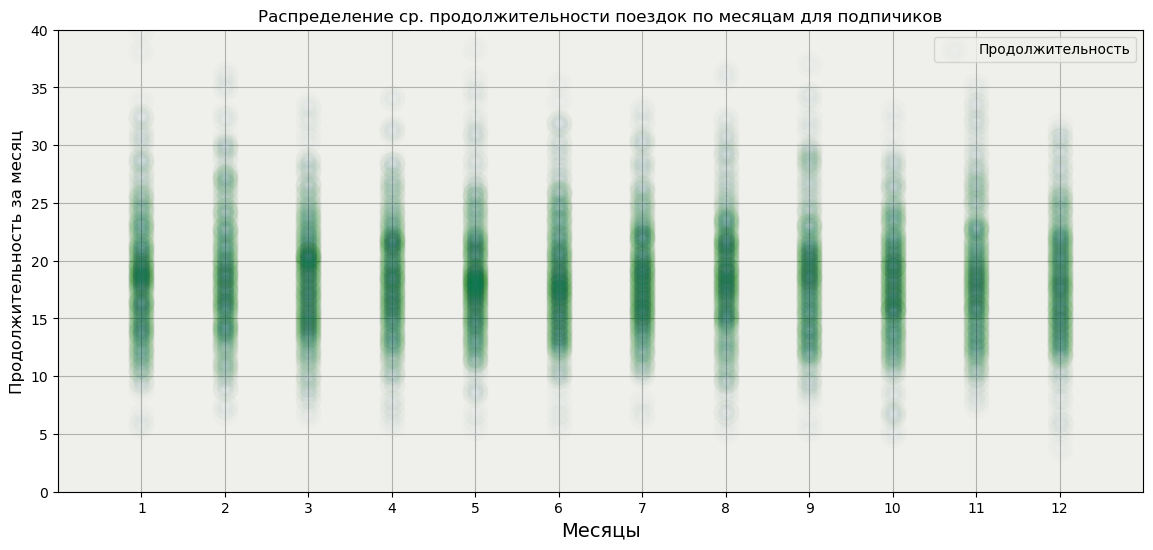

In [71]:
fsize(14,6)

plt.scatter(x=rides_ultra_groupped_duration['month'], y=rides_ultra_groupped_duration['duration']\
          , alpha=0.01, s=150, linewidths=6.5, edgecolor='green')

plt.title('Распределение ср. продолжительности поездок по месяцам для подпичиков')
plt.legend(['Продолжительность'])

plt.ylim(0, 40)
plt.xlim(0, 13)

plt.gca().set_axisbelow(True)

plt.xticks(ticks=list(range(1, 13)))
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Продолжительность за месяц', fontsize=12)

plt.grid(True)

- Распределение среднемесячной продолжительности поездки по месяцам у пользователей без подписки:

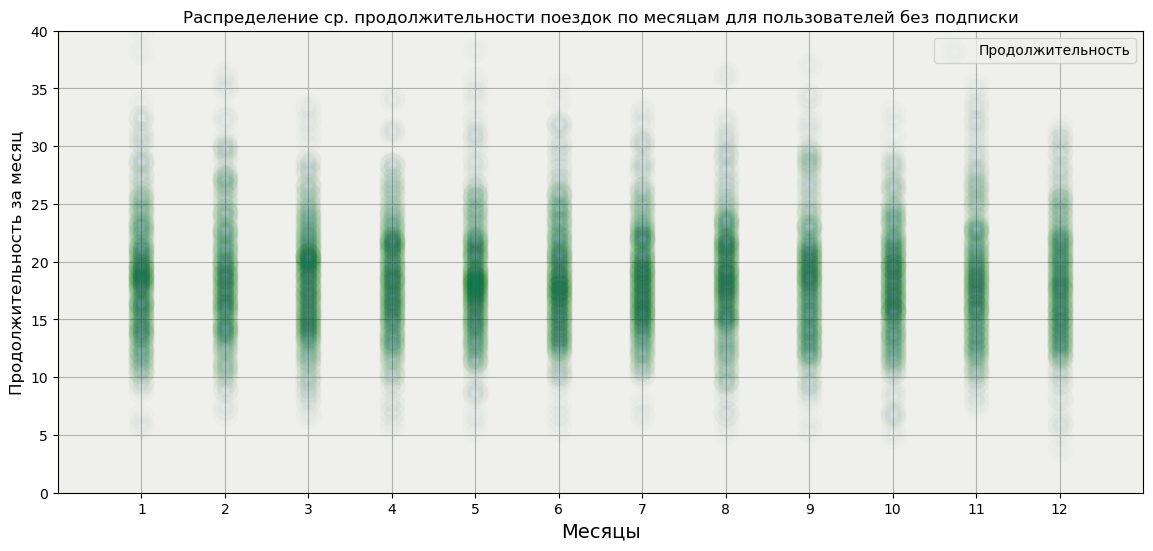

In [72]:
fsize(14,6)

plt.scatter(x=rides_free_groupped_duration['month'], y=rides_free_groupped_duration['duration']\
          , alpha=0.01, s=150, linewidths=6.5, edgecolor='green')

plt.title('Распределение ср. продолжительности поездок по месяцам для пользователей без подписки')
plt.legend(['Продолжительность'])

plt.ylim(0, 40)
plt.xlim(0, 13)

plt.gca().set_axisbelow(True)

plt.xticks(ticks=list(range(1, 13)))
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Продолжительность за месяц', fontsize=12)

plt.grid(True)

_Каких-то значимых выводов из этих визуализаций, кроме примерной оценки разброса значений, сделать сложно._

__Зависимость распределения возраста от наличия подписки:__

In [73]:
users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [74]:
users[users['user_id']<id_free]

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
694,695,Злата,14,Тюмень,ultra
695,696,Игорь,24,Москва,ultra
696,697,Ясмина,24,Москва,ultra
697,698,Егор,26,Пятигорск,ultra


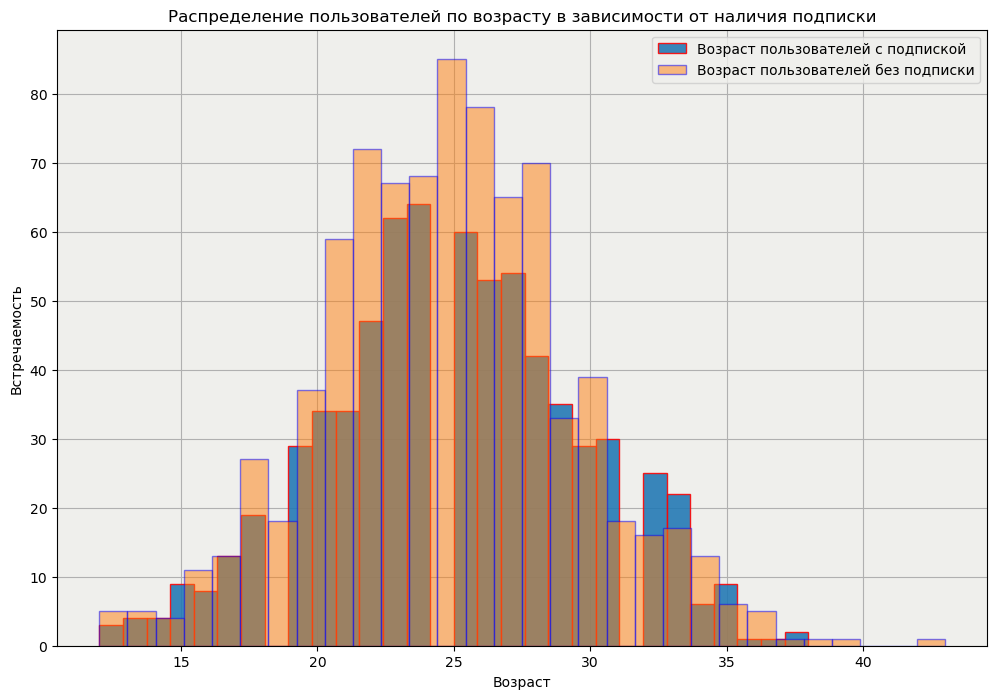

In [75]:
fsize(12, 8)
labels = ['Возраст пользователей с подпиской', 'Возраст пользователей без подписки']
ecolor = 'red'
hist_eye(users[users['user_id']<id_free]['age'], 30, 0.88, 'Возраст', 'Встречаемость', 'Распределение пользователей по возрасту')
ecolor = 'blue'
hist_eye(users[users['user_id']>=id_free]['age'], 30, 0.5, 'Возраст', 'Встречаемость', 'Распределение пользователей по возрасту в зависимости от наличия подписки')

_Кроме разницы в величине распределения пользователей без подписки и более длинного правого хвоста, ничего не наблюдается._

__Зависимость распределения расстояний от времени года для пользователей с подпиской:__

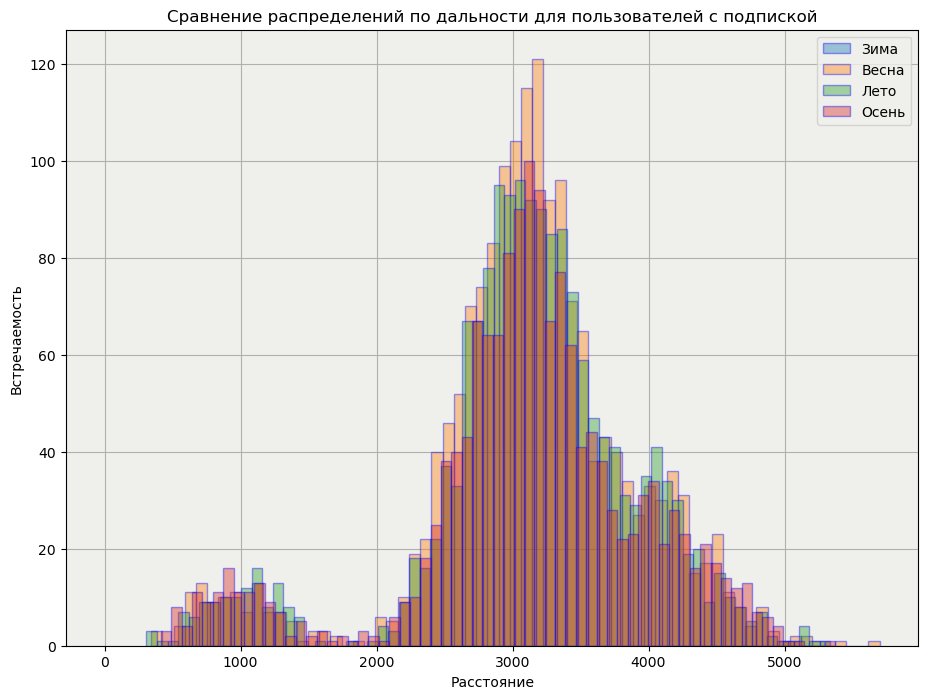

In [76]:
fsize(11, 8)
hist_eye(data_subfull.query('(month < 3) & (month == 12)')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subfull.query('2 < month < 6')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subfull.query('5 < month < 9')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subfull.query('8 < month < 12')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
# hist_eye(data_subfull['distance'], 65, 0.6, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.legend(('Зима', 'Весна','Лето', 'Осень'))
plt.title('Сравнение распределений по дальности для пользователей с подпиской')
plt.show()

_Не заметно отличий, кроме небольших по дисперсиям и общей плотности вероятности_

__Зависимость распределения расстояний от времени года для пользователей без подписки:__

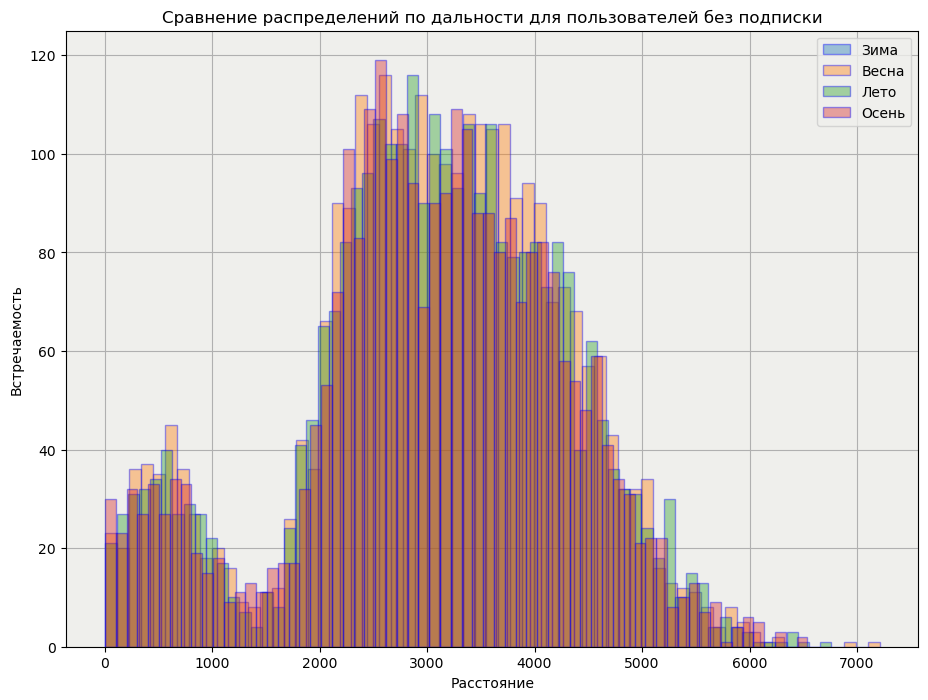

In [77]:
fsize(11, 8)
hist_eye(data_subless.query('(month < 3) & (month == 12)')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subless.query('2 < month < 6')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subless.query('5 < month < 9')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subless.query('8 < month < 12')['distance'], 65, 0.4, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
# hist_eye(data_subless['distance'], 65, 0.6, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.legend(('Зима', 'Весна','Лето', 'Осень'))
plt.title('Сравнение распределений по дальности для пользователей без подписки')
plt.show()

_Здесь тоже довольно схожие распределения_

__Распределение в конкретном городе:__

In [78]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

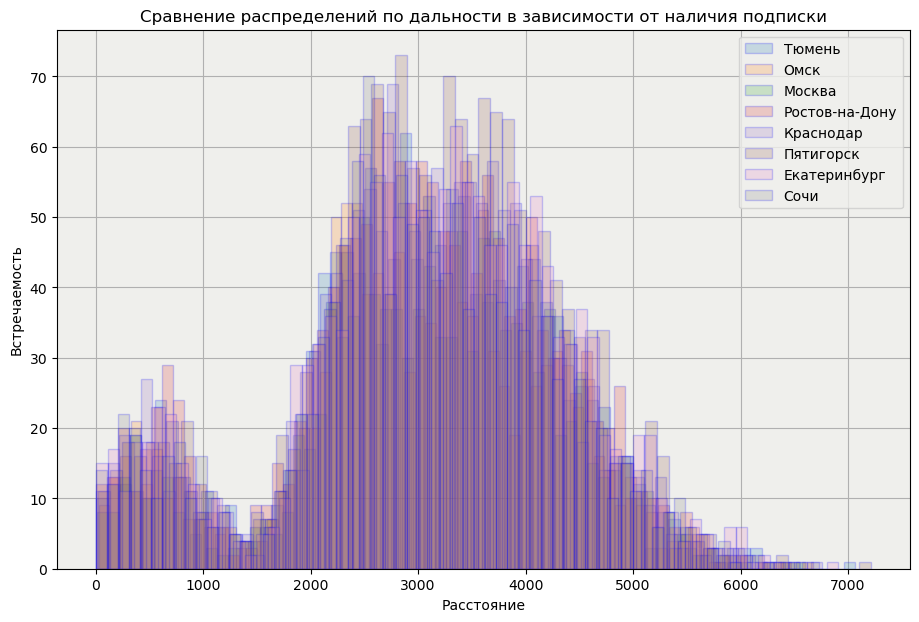

In [79]:
fsize(11, 7)
for i in range(len(users['city'].unique())):
    hist_eye(data_subless[data_subless['city'] == users['city'].unique()[i]]['distance'], 65, 0.2, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')

plt.legend(users['city'].unique())
plt.title('Сравнение распределений по дальности в зависимости от наличия подписки')
plt.show()    

_По этой визуализации сложно делать какие либо выводы. Особых аномалий не наблюдается_

### Вывод по визуализации объединённых данных:

_Исходя из предоставленной информации, можно сделать следующие выводы:_  

- Общее количество поездок с подпиской "free" больше, чем с подпиской "ultra".
- Средняя дистанция за месяц у пользователей с подпиской "ultra" больше, чем с подпиской "free".
- Средняя дистанция за месяц у пользователей без подписки ("free") значительно больше широко распределена, чем у пользователей с подпиской("ultra").
- Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской "free".  
- Дистанция поездок при использовании подписки "free" более разнообразна, средняя дистанция короче, а стандартное отклонение больше, чем при использовании подписки "ultra".  
- Группа молодых пользователей(от 18 до 29) - самая многочисленная. Стоит обратить особое внимание на таргетирование её запросов.  
- Сезонность использования разных типов подписки схожа.  
 
_Также стоит отметить, что при использовании обоих типов подписок наблюдается два пика: первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях, а при наблюдении за дальностью поездки подписчиков можем наблюдать третий пик правее основного. Данные выводы стоит передать отделу маркетинга для использования в целях улучшения стратегий взаимодействия с конкретными группами клиентов._

##  Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

In [80]:
# Датафрейм из шага 4
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


__Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц:__

In [81]:
for i in range(len(data)):    # Округляем длительность каждой поездки в сторону следующего целого
    data.loc[i, 'duration'] = math.ceil(data.loc[i, 'duration'])

In [82]:
data['duration'] = data['duration'].astype('int64')
display(data.head())
data.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 1.6+ MB


In [83]:
data_revenue = data.groupby(['user_id', 'subscription_type', 'month'])\
               .agg({'distance': 'sum', 'duration': 'sum', 'age': 'count'})

data_revenue = data_revenue.rename(columns={'age': 'count'})
data_revenue.sort_values(['user_id','month']).head(10)

distance  duration  count
user_id subscription_type month                               
1       ultra             1       7027.511294        42      2
                          4        754.159807         7      1
                          8       6723.470560        46      2
                          10      5809.911100        32      2
                          11      7003.499363        56      3
                          12      6751.629942        28      2
2       ultra             3      10187.723006        63      3
                          4       6164.381824        40      2
                          6       3255.338202        14      1
                          7       6780.722964        48      2

Также для будущих рассчетов создадим из общего датафрейма с аггрегированными данными(шаг 4) датафрейм, содержащий аггрегированную по каждому пользователю информацию о суммарно преодоленном расстоянии, суммарном времени в пути и количестве поездок за весь период сбора данных для пользователей с подпиской. Составим его из отдельных датафреймов по пользователем с подпиской и без неё.

In [84]:
data_sum_ultra = data[data['subscription_type'] == 'ultra'].groupby('user_id')\
                                                           .agg({'distance': 'sum', 'duration': 'sum', 'age': 'count'})

#Переименовываем столбцы на количество поездок:
data_sum_ultra = data_sum_ultra.rename(columns={'age': 'count'})

# Cуммарное расстояние, количество поездок и суммарное время для пользователей с подпиской за весь период:
display(data_sum_ultra.head().style.set_caption('data_sum_ultra'))


,distance,duration,count
user_id,,,
1,34070.182066,211,12
2,33964.058614,203,11
3,36907.597866,239,12
4,44837.189916,293,14
5,35556.949649,180,11


### Добавление столбца с помесячной выручкой, которую принёс каждый пользователь. 


Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости уже округлена до следующего целого числа.

In [85]:
subs

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [86]:
data_revenue_res_index = data_revenue.reset_index()
data_revenue_res_index.head()

,user_id,subscription_type,month,distance,duration,count
0,1,ultra,1,7027.511294,42,2
1,1,ultra,4,754.159807,7,1
2,1,ultra,8,6723.470560,46,2
3,1,ultra,10,5809.911100,32,2
4,1,ultra,11,7003.499363,56,3


Зная, что первые 699 пользователей обладают подпиской, найдём индекс первого пользователя без подписки:

In [87]:
index_free = data_revenue_res_index[data_revenue_res_index['user_id'] == id_free].index[0]
index_free

4533

Теперь подсчитаем выручку для обеих категорий пользователей двумя отдельнымси циклами, что должно ускорить код по сравнению с условием на тип подписки внутри общего цикла. Выручку считаем по схеме:
_"месячная выручка" = "стоимость начала поездки" + "продолжительность поездки" * "стоимость минуты" + "стоимость абонплаты"_, не забывая округлить продолжительность поездки до следующего целого.

In [88]:
# Рассчитываем выручку для пользователей с подпиской:
for i in range(0, index_free):
    data_revenue_res_index.loc[i, 'monthly_revenue'] = data_revenue_res_index.loc[i, 'duration'] * 6 +199

# Рассчитываем выручку для пользователей без подписки:
for i in range(index_free, len(data_revenue_res_index)):
    data_revenue_res_index.loc[i, 'monthly_revenue'] = 50 + data_revenue_res_index.loc[i, 'duration'] * 8

data_revenue_res_index['monthly_revenue'] = data_revenue_res_index['monthly_revenue'].astype(int)

display('Количество пропусков в получившейся таблице:', data_revenue_res_index['monthly_revenue'].isna().sum())
display(data_revenue_res_index.head(), data_revenue_res_index.tail()) # Обзор полученных результатов

#Проверяем,на месте ли начало пользователей без подписки:
data_revenue_res_index.loc[(index_free-1), 'subscription_type'], data_revenue_res_index.loc[index_free, 'subscription_type']

'Количество пропусков в получившейся таблице:'

0

,user_id,subscription_type,month,distance,duration,count,monthly_revenue
0,1,ultra,1,7027.511294,42,2,451
1,1,ultra,4,754.159807,7,1,241
2,1,ultra,8,6723.470560,46,2,475
3,1,ultra,10,5809.911100,32,2,391
4,1,ultra,11,7003.499363,56,3,535


,user_id,subscription_type,month,distance,duration,count,monthly_revenue
11326,1534,free,6,3409.468534,26,2,258
11327,1534,free,8,7622.453034,48,2,434
11328,1534,free,9,4928.173852,23,1,234
11329,1534,free,11,13350.015305,78,4,674
11330,1534,free,12,2371.711192,16,1,178


('ultra', 'free')

In [89]:
# Перезапишем таблицу с помесячной прибылью:
display(data_revenue_res_index.set_index(['user_id', 'subscription_type', 'month']).head())
data_revenue = data_revenue_res_index.set_index(['user_id', 'subscription_type', 'month'])

distance  duration  count  monthly_revenue
user_id subscription_type month                                               
1       ultra             1      7027.511294        42      2              451
                          4       754.159807         7      1              241
                          8      6723.470560        46      2              475
                          10     5809.911100        32      2              391
                          11     7003.499363        56      3              535

_Столбец с помесячной выручкой добавлен._

##  Проверка гипотез

__Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.__


_1.Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании._<br>
_2.Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?_<br>
_3.Проверка гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки._<br>
_4.Поиск стратегии решения гипотетического кейса о количестве обращений в техподдержку до и после обновления_<br>

### Задание №1.<br> <br>Тратят ли пользователи с подпиской больше времени на поездки?

Сформулируем и проверим гипотезы, используя данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. Собственно, гипотезы:
<br>
<br>
_Нулевая гипотеза_: Пользователи с подпиской и пользователи без подписки тратят на поездки столько же времени.
<br>
<br>
_Альтернативная гипотеза_: Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

In [90]:
# Датафреймы с данными о продолжительности каждой сессии
display(data_subfull.head(), data_subless.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Выборки достаточно большие, опираясь на исследовательский анализ, довольно репрезентативные, без значительных выбросов и применяются к двум непересекающимся совокупностям. Можно использовать статистический тест(t-тест) для сравнения средних двух независимых выборок - двухвыборочный t-тест(t-критерий Стьюдента применяется как к небольшим, так и к выборкам, по размеру => распределению не отличимым от нормальных).

Собственно проверка гипотезы. Тратят ли пользователи с подпиской больше времени на поездки?

In [91]:
alpha = 0.5
duration_test = st.ttest_ind(data_subfull['duration'], data_subless['duration'], equal_var=False, alternative='greater')
duration_test

TtestResult(statistic=12.683043751946238, pvalue=5.6757813771289775e-37, df=14924.96306205658)

Статистика разности показывает количественную разницу между выборочными средними, а p-value - вероятность получить выборки так далеко отстоящие друг от друга при условии справедливости нулевой гипотезы. Статистика разности - большая, вероятность - на много порядков ниже порога статистической значимости. Отвергаем нулевую гипотезу в пользу первой. 

<!-- Можно понять как "продолжительность случайной поездки у пользователей с подпиской больше". Или что "суммарно пользователи с подпиской больше проводят времени в поездках". По-моему, это сильно разные вещи. -->

In [92]:
if duration_test.pvalue > alpha:
    display('Не отвергаем нулевую гипотезу в пользу первой')
else:
    display('Отвергаем нулевую гипотезу в пользу первой')
    

'Отвергаем нулевую гипотезу в пользу первой'

__Существует статистически значимая разница во времени поездок между пользователями без подписки и пользователями с подпиской.
Пользователи с подпиской тратят больше времени на поездки.__

In [93]:
[data_subfull['duration'].mean(), data_subless['duration'].mean()]

[18.54198516280583, 17.39090929866399]

In [94]:
[data_subfull['duration'].median(), data_subless['duration'].median()]

[18.17815320055055, 17.326890226082043]

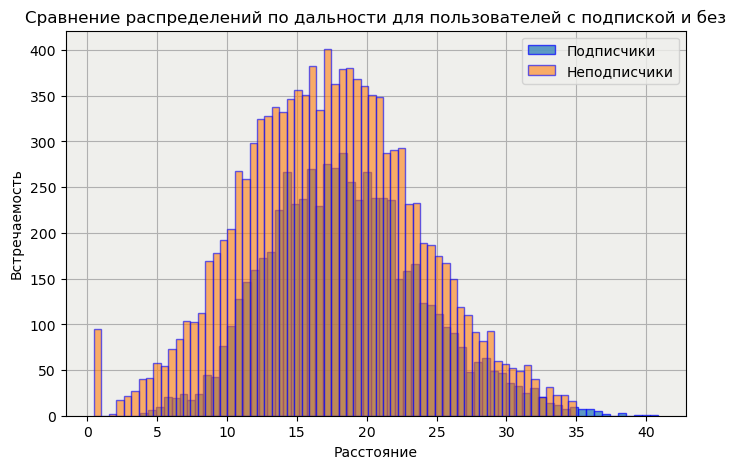

In [95]:
fsize(8, 5)
hist_eye(data_subfull['duration'], 65, 0.7, 'Расстояние', 'Встречаемость', 'Распределение по дальности для подписчиков')
hist_eye(data_subless['duration'], 65, 0.6, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.legend(('Подписчики','Неподписчики'))
plt.title('Сравнение распределений по дальности для пользователей с подпиской и без')
plt.show()

_На основе наших статистичеких рассчетов и визуализации предоставленных данных можно сделать вывод, что пользователи с активной подпиской на сервис проводят в поездках больше времени. Это подтверждается сравнительными статистическими данными о продолжительности поездок и средними/медианными значениями этого показателя.
Различия в продолжительности поездок между пользователями с подпиской и без неё могут быть связаны с тем, что пользователи с подпиской более осознанно подходят к использованию сервиса и получают больше выгоды от своих поездок.
Эта информация может быть полезной для разработки новых тарифных планов, акций и других предложений, направленных на стимулирование пользователей активнее использовать сервис и привлечение тех, кто пока не оформил подписку._

### Задание №2.<br> <br> Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, 3130 метров?

 __Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Определим с помощью статистического теста, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.__

Сформулируем гипотезы:

_-Нулевая гипотеза:_ Среднее расстояние, которое проезжают подписчики, равно 3130 м.

_-Альтернативная гипотеза:_ Среднее расстояние, которое проезжают подписчики, больше 3130 м.

При значимо бОльшем, чем 3130 м,  среднем расстоянии нулевая гипотеза отвергается в пользу альтернативной.

Сперва получим список со средней за всё время наблюдения дистанцией поездки для пользователей с подпиской, используя датафрейм с данными о дальности, продолжительности и количестве поездок подписчиков за весь период.

In [96]:
data_sum_ultra.head()

,distance,duration,count
user_id,,,
1,34070.182066,211,12
2,33964.058614,203,11
3,36907.597866,239,12
4,44837.189916,293,14
5,35556.949649,180,11


In [97]:
mean_distance_ultra = data_sum_ultra['distance'] / data_sum_ultra['count']
mean_distance_ultra.head() #Cредняя дистанция за месяц по каждому пользователю

user_id
1    2839.181839
2    3087.641692
3    3075.633155
4    3202.656423
5    3232.449968
dtype: float64

In [98]:
# Вводные параметры
alpha = 0.05  #стат. значимость
optimal_distance = 3130 # константа, с которой будет сравниваться среднее выборочное

In [99]:
# Собственно проверка гипотезы:

alpha = 0.05
optimal_distance = 3130
distance_test = st.ttest_1samp(
    mean_distance_ultra, 
    optimal_distance,
      alternative='greater')

print('p-значение:', distance_test.pvalue)

if (distance_test.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9275041260050892
Не отвергаем нулевую гипотезу


_Т.к. по результатам статистического теста мы не отвергли нулевую гипотезу, то это с большой долей вероятности значит, что пользователи с подпиской проезжают в среднем за поездку 3130 м или меньше, т.е не испытывают пределов прочности самоката._

__Исходя из результатов т-теста, можем с большой долей уверенности утверждать, что пользователи с подпиской не испытывают предел износостойкости самокатов.__

In [100]:
mean_distance_ultra.mean(), mean_distance_ultra.median()

(3113.459926039899, 3134.3491864082407)

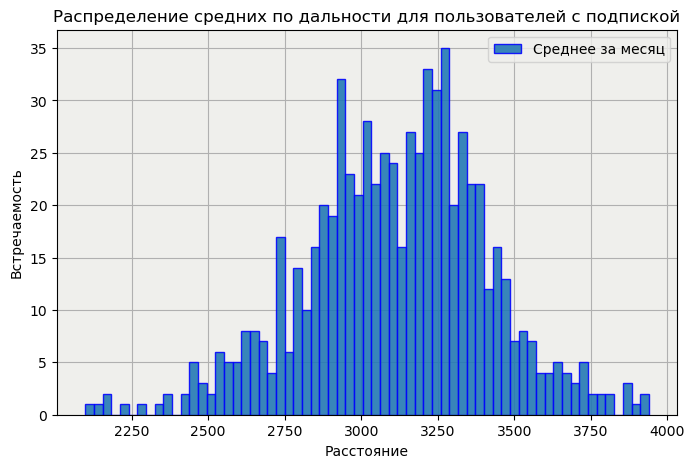

In [101]:
fsize(8, 5)
labels = ['Среднее за месяц']
hist_eye(mean_distance_ultra, 65, 0.88, 'Расстояние', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.title('Распределение средних по дальности для пользователей с подпиской')
plt.show()

_На основе произведенных расчётов и визуализации предоставленных данных с большой долей вероятноси можно сделать вывод о том, что пользователи с активной подпиской на сервис проезжают в среднем менее 3130 метров за одну поездку.<br>     Статистический анализ показал, что нет достаточных оснований для отклонения нулевой гипотезы о том, что они проезжают 3130м или меньше.  
Однако, стоит отметить, что пользователи с подпиской проезжают менее разнообразное расстояние. Это может быть связано с тем, что они используют сервис более осознанно и выбирают более подходящие маршруты.  
Эта информация может быть полезной для планирования обновления и замены парка самокатов, учитывая приблизительные результаты износа и особенности использования сервиса пользователями с подпиской._

### Задание  №3.<br>  <br>  Проверка гипотезы о том, что  помесячная выручка от пользователей с подпиской  выше, чем помесячная выручка от пользователей без подписки. Сделайте вывод.

Сформулируем гипотезы:

_-Нулевая гипотеза: Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки._

_-Альтернативная гипотеза: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки._

В случае, если среднее помесячной выручки от пользователей с подпиской статистически значимо меньше, чем среднее от пользователей без подписки, нулевая гипотеза не отклоняется.

Из датафрейма с помесячной выручкой извлечём отдельно список с выручкой от пользователей с подпиской и список с выручкой от пользователей без подписки, зная индекс, с которого начинаются пользователи без неё.

In [102]:
ultra = data_revenue_res_index.loc[:(index_free-1),'monthly_revenue']
free = data_revenue_res_index.loc[index_free:,'monthly_revenue']        
#[data_revenue['subscription_type'] == 'free']['monthly_revenue']

ultra, free # Списки с помесячной выручкой от пользователей с подпиской и без неё.

(0       451
 1       241
 2       475
 3       391
 4       535
        ... 
 4528    301
 4529    469
 4530    385
 4531    295
 4532    355
 Name: monthly_revenue, Length: 4533, dtype: int32,
 4533     170
 4534     762
 4535     202
 4536     178
 4537     282
         ... 
 11326    258
 11327    434
 11328    234
 11329    674
 11330    178
 Name: monthly_revenue, Length: 6798, dtype: int32)

Опять же, размеры выборок довольно велики, совокупности не пересекаются. Можем применить двухвыборочный t-тест для сравнения независимых выборок: st.ttest_ind. Аргументами указываются сами независимые выборки, равность дисперсий выборок(boolean), и тип альтернативной гипотезы(право-, лево-, двустороняя). Результатом тест выдаёт разность средних исследуемых совокупностей и p-value, на основании которых отвергается или не отвергается нулевая гипотеза.

In [103]:
alpha = 0.05 # Задаём уровень статистической значимости

In [104]:
revenue_test = st.ttest_ind(ultra, free, equal_var=False, alternative='greater')
revenue_test

TtestResult(statistic=31.84381150429009, pvalue=1.8822802352406446e-213, df=11266.533266521705)

In [105]:
if revenue_test.pvalue > alpha:
    display('Не отвергаем нулевую гипотезу в пользу первой')
else:
    display('Отвергаем нулевую гипотезу в пользу первой')
    
    

'Отвергаем нулевую гипотезу в пользу первой'

Наши гипотезы были:<br>

- Нулевая гипотеза: Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

- Альтернативная гипотеза: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
  
  
__Раз мы отвергаем нашу нулевую гипотезу в пользу первой, то свыбранной нами статистической значимостью можно утверждать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.__

In [106]:
#  Сравнение средних исследуемых выборок. Насколько я понимаю суть метода, вероятность того, 
# что множества с одинаковыми матожиданиями дадут такие разные средние выборочные, крайне мала, 
# при том, что выборочное среднее подписчиков больше оного пользователей без подписки.
data_revenue_res_index.loc[:(index_free-1),'monthly_revenue'].mean()\
, data_revenue_res_index.loc[index_free:,'monthly_revenue'].mean()

(362.7921906022502, 293.5575169167402)

Видим, что средние выборок заметно отличаются, подтверждая статистический тест.

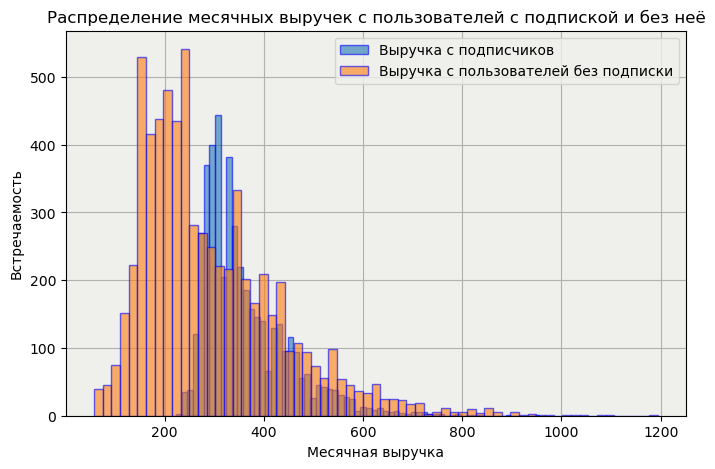

In [107]:
fsize(8, 5)
labels = ['Выручка с подписчиков', 'Выручка с пользователей без подписки']
hist_eye(ultra, 65, 0.6, 'Месячная выручка', 'Встречаемость', 'Распределение по дальности для неподписчиков')
hist_eye(free, 65, 0.6, 'Месячная выручка', 'Встречаемость', 'Распределение по дальности для неподписчиков')
plt.legend(labels)
plt.title('Распределение месячных выручек с пользователей с подпиской и без неё')
plt.show()

_Исходя из результатов статистического теста и визуализации, можно с высокой долей вероятности утверждать, что прибыль от пользователей с подпиской выше, чем от пользователей без неё. Хотя поездок больше у пользователей без подписки, то, что поездки пользователей с подпиской настолько значимо длиннее, перевешивает как меньшее количество поездок, так и более дешевую цену минут. Хотя стартовая цена на стороне количества поездок, о чём не стоит забывать. И это при условии, что самокат не подвергается избыточному износу. Судя по всему, стоит сосредоточить усилия на пользователях с подпиской и переводе пользователей без подписки в разряд подписчиков._

### Задание №4. <br><br>Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Условие гласит, что данные собираются с одной и той же группы пользователей в случае первой выборки и в случае второй, изменились лишь условия, т.е. эти выборки имеют пользователезависимые отношения, so to speak)). Следовательно, мы имеем 2 зависимые (парные) выборки. Для вычисления будем использовать встроенный  тест на сравнение средних двух зависимых выборок: st.ttest_rel(before, after, alternative='less', 'greater' or 'two-sided').scipy.stats.ttest_rel принимает аргументы: наборы данных в виде списка — две парные выборки до и после изменения, и тип альтернативной гипотезы: лево-, право- или двусторонняя, что отражает нахождение критических областей относительно предполагаемого среднего. Сформулируем гипотезы, исходя из условия:

_-Нулевая гипотеза: Равенство среднего значения генеральной совокупности (данные о количестве обращений в техподдержку для каждого пользователя) до и после изменения(обновления серверов)._

_-Альтернативная гипотеза: Среднее генеральной совокупности до изменения(среднее количество обращений в поддержку до обновления серверов) больше среднего генеральной совокупности после изменения._

__Если указать alternative='greater', альтернативной будет правосторонняя гипотеза о том, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения(среднее выборки, стоящей в аргументах первой, больше среднего второй выборки). `Это наш случай.`__

### Вывод по проверке гипотез

_Исходя из предоставленных данных, можно сделать следующие выводы:_  
- Пользователи с активной подпиской на сервис проводят в поездках больше времени, чем пользователи без подписки. Это подтверждается статистическими данными о продолжительности поездок и медианными значениями этого показателя.
- Нельзя утверждать, что пользователи с подпиской в среднем проезжают более оптимальное расстояние за одну поездку. Однако значение близко к оптимальному с точки зрения износа самоката.
- Пользователи с подпиской проезжают менее разнообразное расстояние. Это может быть связано с тем, что они используют сервис более осознанно и выбирают более подходящие маршруты.
- Прибыль от пользователей с подпиской выше, чем от пользователей без подписки. Это свидетельствует о том, что модель подписки приносит дополнительный доход компании в том числе с учетом месячной платы и разницы в цене за минуту/старт.
- Для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов необходимо использовать правосторонний тест на равенство среднего количества обращений до и после обновления для каждого пользователя.

## Шаг.  Распределения

### Задание №1  
__Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.__ 
    
__Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают   10 % пользователей.__
    
__Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.__

Наилучшим с точки зрения подбора распределения, описывающего ситуацию из задачи, будет биноминальное, т.к. количество "экспериментов Бернулли" не очень велико(возможны прямые рассчеты вероятностей), хотя, исходя из приблизительного матожидания и дисперсии, здесь возможна аппроксимация. Попробуем подобрать количество промокодов:

In [108]:
p = 0.1 # Вероятность успеха

# По условию задачи вероятность получить меньше 100 "успехов" не должна быть больше 5%. С помощью 
# кумулятивной функции распределения мы будем отслеживать выполнение этого условия. Её значение находится 
# в пределах от 0 до 1. Мы будем прерывать цикл при превышении порога в 0.05 - это наши 5% невыполнения плана.


success = False # в эту булевую переменную запишем сигнал о том, что мы подобрали условия, и при 95% вероятности
# мы получим как минимум 100 успехов.  

# Начнём подбор с 1000 попыток, понимая, что при 0.1 шансе на успех в каждом испытании матожидание будет равно 100,
# но вероятность получить меньше 100 успехов будет ещё явно слишком велика, и будем постепенно увеличивать количество 
# попыток, пока именно при 100 успехах вероятность не выполнить план будет 5%.


for n in range(1000, 1500): 
    if success:
        break         # В случае подбора n обрываем цикл - цель достигнута
#    print(n)

# Аккумулированная сумма вероятностей исходов на определённом шаге построения распределения, 
# т.е. площадь "левого хвоста", вероятность такого количества успехов, и любого меньшего:
    sum_distr = 0 # Обнуляем перед циклом построения распределения и будем в него "накапливать" вероятности исходов "левее" текущего.  
    
#  Список, содержащий распределение Бернулли вероятностей получить определённое количество
# "успехов" при дискретном числе "испытаний" и заданной вероятности "успеха":
    distr = []  # объявляем новый перед циклом
    
    for k in range(0, n + 1):
        choose = factorial(n) / (factorial(k) * factorial(n - k))
        prob = choose * p**k * (1 - p)**(n - k) 
        distr.append(prob) # добавляем поэлементно в список вероятности к-го исхода из n-испытаний Бернулли
        sum_distr += prob  # аккуммулируем вероятности от 1 до k исходов   
        if sum_distr - 0.05 > 0:  # Если вероятность [к-успехов и меньше] уже выше 5 % и  
            if k < 100:           # если успехов меньше 100, значит n - недостаточное => 
                break             # выходим из внутреннего цикла и увеличиваем n на 1
            else:                        # Если вероятность [к-успехов и меньше] уже выше 5 % и
                print('Победа! n = ', n) # если успехов = 100, значит n - подобрано 
                success = True           # записываем в глобальную переменную маркер завершения цикла
                break
                

Победа! n =  1161


Используем найденное количество промокодов для построения визуализации. Прямым вычислением эту визуализацию не построить, т.к. вычисление таких больших факториалов находится за пределами вычислительных возможностей. n=1021 - это максимум возможного. Построим сперва для n=1021, просто для ознакомления. Заодно увидим, насколько влияет на выполнение плана такое недостаточное количество промокодов:

<BarContainer object of 1022 artists>

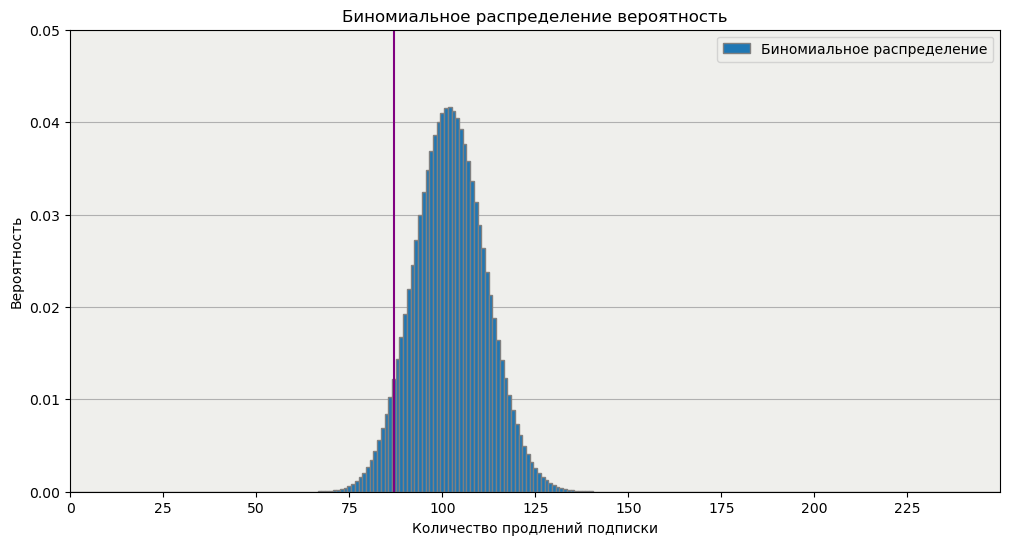

In [109]:
fsize(12, 6)
n = 1021 # количество попыток
p = 0.1 # вероятность успеха

distr = []
sum_distr = 0

vert = True
v = 0
for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    sum_distr += prob

    if vert:
        if sum_distr - 0.05 > 0:
            v = k
            vert = False
display(plt.bar(range(0, n + 1), distr, width=1, edgecolor='grey'))


plt.title('Биномиальное распределение вероятность')
plt.legend(['Биномиальное распределение'])
plt.ylim(0, 0.05)
plt.xlim(0, 250)
plt.xticks(ticks=list(range(0, 250, 25)))
plt.xlabel('Количество продлений подписки')
plt.ylabel('Вероятность')
plt.grid(True, axis='y')
plt.vlines(x=v, ymin=0, ymax=0.05, colors='purple') # Используем индекс максимума распределения для проведения перпендикуляра
# plt.vlines(x=167, ymin=-5, ymax=1005)
plt.gca().set_axisbelow(True)

plt.show()

 Как можно заметить, при таком количестве промокодов с 95% вероятностью мы получим всего около 85 продлений подписки, а 100 продлений будет чуть больше, чем в 50% случаев. Изменим код, используя встроенные методы библиотеки scipy, в том числе для поиска n, используя методы .ppf, .pmf и .cdf:

'Необходимое для выполнения плана с 95% вероятностью количество промокодов: 1161'

'Количество продлений подписки с 95% вероятностью: 100'

'Матожидание распределения: 116'

'Ст. отклонение распределения: 10.2'

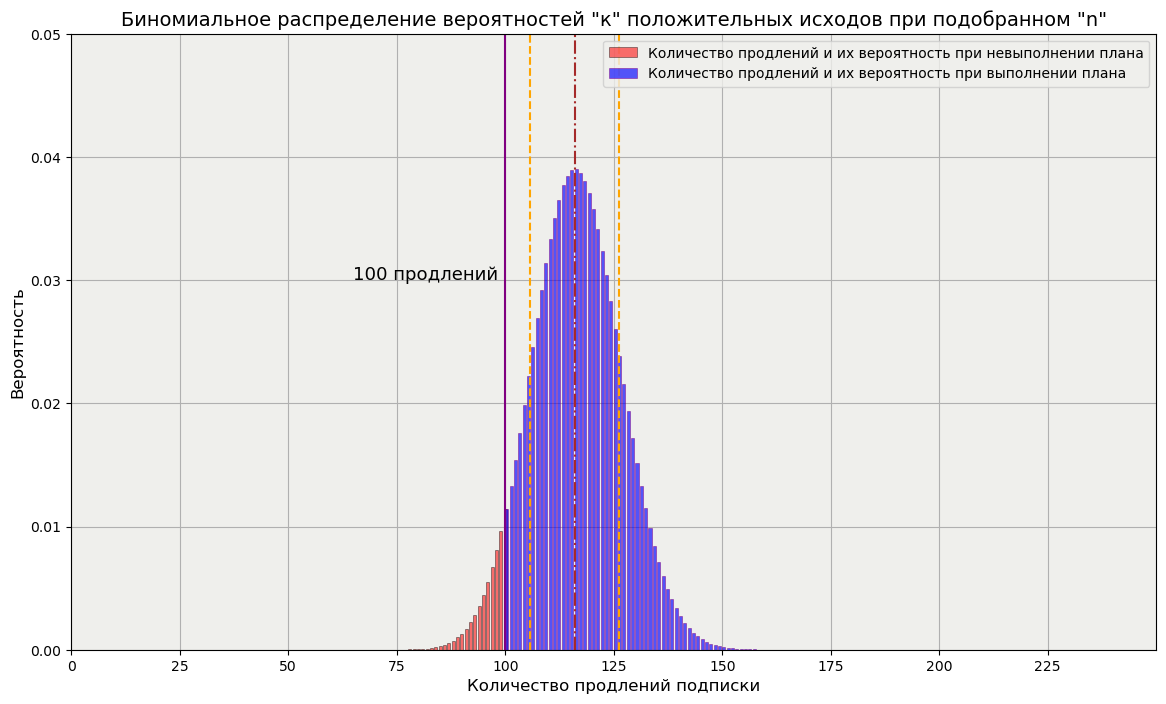

In [110]:
fsize(14, 8)

p = 0.1 # вероятность успеха

for n in range(1000, 1500):
    if binom.ppf(0.05, n, p) - 100 >= 0: # Рассчитываем масимально возможное количество продлений, 
                                         # "содержащееся" в 5% левом хвосте бин. распределения с параметрами n и p.
                                         # Т.к. кроме n остальное известно, n легко найти.
        display('Необходимое для выполнения плана с 95% вероятностью количество промокодов: '+ str(n))
        break

distr = []
vert = True # Находимся "слева" от 5% выполнения плана
v = 0  # Сюда запишем количество успехов, начиная с которого(от v до n) начинаются 95% оставшейся от 1 вероятности
for k in range(0, n + 1):
    prob = binom.pmf(k, n, p) # для построения распределения используем probability mass function method, 
    distr.append(prob) # дающий аналогичные вышенаписанным формулам результаты.
    if vert:
        if binom.cdf(k, n, p) > 0.05:  # также используем cumulative distribution function для определения 
                                       # накопленной вероятности благ. исходов от 1 до к, вместо sum_distr
            v = k
            vert = False               # к определено, его можно больше не искать
            
plt.bar(range(0, v+1), distr[0: v+1], width= -0.68, color='red', align='center',linewidth=0.5, edgecolor='black', alpha=0.55) # Случаи невыполнения плана
plt.bar(range(v, n+1), distr[v: (n+1)], width= 0.7, color='blue', align='edge', linewidth=0.5, edgecolor='purple', alpha=0.65) # Выполненный план

display('Количество продлений подписки с 95% вероятностью: '+ str(v))

plt.title('Биномиальное распределение вероятностей "к" положительных исходов при подобранном "n"', fontsize=14)
plt.legend(['Количество продлений и их вероятность при невыполнении плана'\
          , 'Количество продлений и их вероятность при выполнении плана'])
plt.ylim(0, 0.05)
plt.xlim(0, 250)
plt.xlabel('Количество продлений подписки', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.xticks(ticks=list(range(0, 250, 25)))
plt.grid(True)

# Визуализируем отсечку по количеству продлений, с которой начинается 95% выполнение плана
plt.vlines(x=v, ymin=0, ymax=0.05, color='purple') 

# Ищем индекс максимума распределения для проверки совпадения с матожиданием n*p
mu = pd.DataFrame(distr).idxmax(axis=0)[0]
sigma = round((sqrt(n * p * (1 - p))), 1) # Раз уж знаем мю)

display('Матожидание распределения: '+ str(pd.DataFrame(distr).idxmax(axis=0)[0]))
display('Ст. отклонение распределения: '+ str(sigma))

plt.text(65, 0.03, '100 продлений', horizontalalignment='left', fontsize=13)

plt.vlines(x=mu - sigma, ymin=0, ymax=0.05, linestyles = '--', colors='orange')
plt.vlines(x=mu + sigma, ymin=0, ymax=0.05, linestyles = '--', colors='orange')
plt.vlines(x=mu, ymin=0, ymax=0.05, linestyles = 'dashdot', colors='brown')

plt.gca().set_axisbelow(True)

plt.show()

_В итоге мы подобрали параметры для биномиального распределения, описывающего эту ситуацию, построили визуализацию распределения и желаемого соотношения вероятностей выполнения/невыполнения плана и выяснили, какое минимальное количество промокодов нужно разослать для получения продления подписки от минимум 100 клиентов с 95%, получив оценку в 1161 промокод._

### Задание №2 
__Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений.__  

__С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.__

Здесь из-за большого количества "экспериментов Бернулли" лучше аппроксимировать распределение нормальным, т.к. при таком количестве уведомлений оно будет неотличимо от Биноминального. Подсчитаем параметры аппроксимирующего распределения и построим его:

Условие аппроксимации выполняется
Вероятность, полученная аппроксимацией: 0.15371708296369768
Вероятность, полученная для биномиального распределения: 0.15395843595642772


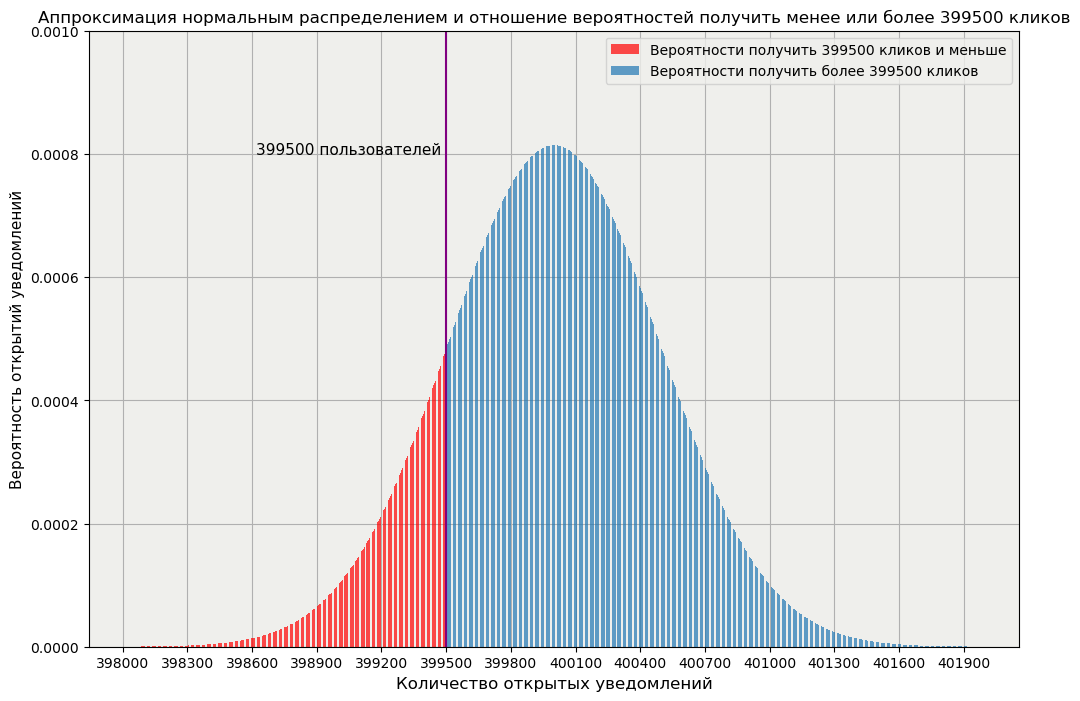

In [111]:
fsize(12, 8)

# Задаём параметры биномиального распределения
n = 1000000
p = 0.4
# Зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# Выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие аппроксимации выполняется')
else:
    print('Условие аппроксимации не выполняется')

# Задаём нормальное распределение
distr = st.norm(mu, sigma) 

# Считаем вероятность хвоста слева от 399.500 тысяч
result = distr.cdf(399500)   # Вероятность, полученная с помощью функции накопления аппрокмирующего нормального распределения
print('Вероятность, полученная аппроксимацией:', result)

print('Вероятность, полученная для биномиального распределения:', binom.cdf(399500, n, p)) # Вероятность, полученная с помощью аккум. функции биномиального распределения.
                                 # Как можно заметить, они слабо отличаются.
    
# Границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))


# Получим список из 100 чисел от left до right
x = linspace(left, right, 1000)

# Находим индекс в списке меток "х", соответствующий 399500 кликам:
min_diff = abs(pd.Series(x)-399500).min() #минимально отличный от 399500 элемент списка, вернее само отличие
index = (abs(pd.Series(x)-399500) == min_diff).idxmax() # индекс этого отличия и элемента, соответственно

# Рисуем отсечку в 399500 кликов и график нормального распределения:

plt.vlines(x=399500, ymin=0, ymax=0.001, colors='purple')
# Добавление текстовой подписи к отсечке
plt.text(399050, 0.0008, '399500 пользователей', horizontalalignment='center', fontsize=11)

plt.bar(x[:index], norm.pdf(x[:index], mu, sigma), alpha=0.7, width=2.515, align='edge', color='red', label='Вероятности получить 399500 кликов и меньше') 
plt.bar(x[index:1000], norm.pdf(x[index:1000], mu, sigma), alpha=0.7, width=2.515, label='Вероятности получить более 399500 кликов') 

# Зададим подписи по оси x в пределах ± 4 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 4 * sigma), int(mu + 4 * sigma), 300))
plt.xticks(list(pd.Series(x_ticks)-40))
plt.ylim(0, 0.001)

plt.xlabel('Количество открытых уведомлений', fontsize=12)
plt.ylabel('Вероятность открытий уведомлений', fontsize=11)

# Настраиваем оптимальное расположение легенды и выводим график
plt.legend(loc='best')
plt.title('Аппроксимация нормальным распределением и отношение вероятностей получить менее или более 399500 кликов')
plt.grid(True)
plt.gca().set_axisbelow(True)

plt.show()

In [112]:
# Убеждаемся, что при площади левого хвоста в 15,37% от общей площади под распределением 
# количество открытых уведомлений не превышает 399500
result_backwards = distr.ppf(0.15371708296369768)
result_backwards

399500.0

_В ходе выполнени данной задачи мы проверили возможность аппроксимации биноминального распределения нормальным, подобрали параметры для нормального распределения, описывающего эту ситуацию, построили визуализацию распределения и желаемого соотношения вероятностей открытия/не открытия уведомления. Зная параметры хорошо аппроксимирующего распределения, применили к нему встроенный метод нахождения кумулятивной функции распределения и нашли вероятность открытия уведомления не более 399,5 тыс пользователями -_ __15.37%.__

# Вывод

_В ходе выполнения данной работы мы прошли несколько этапов абстракции анализа данных, начиная с прямого обзора элементов датафреймов, проводя дальнейшие группировки и срезы данных визуализировали более сложные зависимости и извлекали статистики распределений, а в итоге проверяли статистические гипотезы о различии характеристик потребления продукта у разных групп потребителей, в основном от наличия или отсутствия подписки._  
  
__На основе проведенного анализа данных о пользователях и поездках сервиса GoFast, можно сделать следующие выводы:__  

_Продолжительность поездок:_ Пользователи с активной подпиской проводят в поездках больше времени, что может быть выгодно для компании. Это подтверждается статистикой о продолжительности поездок и медианными значениями.  

_Расстояние поездок:_ Нельзя утверждать, что пользователи с подпиской в среднем проезжают более оптимальное расстояние за одну поездку. Однако значение близко к оптимальному с точки зрения износа самоката.  

_Выручка от подписок:_ Месячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Разница статистически значима.  

__Рекомендации:__  

- Продвигать подписки и привилегии для подписчиков.  

- Оптимизировать размещение самокатов на основе анализа данных.  

- Стимулировать интенсивное использование сервиса через программы лояльности.

- Улучшить аналитику и прогнозирование для более точного планирования.  

- Разработать гибкие тарифы, учитывая разные потребности клиентов.  

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующие материалы:

    Курс "Вероятность и статистика" | Глеб Михайлов (free): https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi

    Методы обнаружения выбросов: https://youtu.be/TOK7Kq7x0yc

<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>